# 2023-02-16

In [1]:
# 파이썬 시각화 패키지 불러오기
import matplotlib.pyplot as plt
%matplotlib inline
# 사용자 운영체제 확인
import platform
platform.system()
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

# 포트폴리오

In [182]:
!pip install finance-datareader

In [3]:
import FinanceDataReader as fdr

In [4]:
import pandas as pd

In [16]:
import numpy as np

In [5]:
df_krx = fdr.StockListing('KRX')[['Code', 'Name']]
df_krx.head()

,Code,Name
0,005930,삼성전자
1,373220,LG에너지솔루션
2,000660,SK하이닉스
3,207940,삼성바이오로직스
4,051910,LG화학


In [6]:
cor_list = ['삼성전자', '고려아연', '두산밥캣', 'NAVER']

In [7]:
cor_df = df_krx[df_krx['Name'].isin(cor_list)]
cor_df

,Code,Name
0,005930,삼성전자
8,035420,NAVER
29,010130,고려아연
87,241560,두산밥캣


In [8]:
result = pd.DataFrame()
for idx, values in cor_df.iterrows():
    df = fdr.DataReader(values['Code'], '2018')
    df['Name'] = values['Name']
    result = pd.concat([result, df])

In [9]:
result['Name'].unique()

array(['삼성전자', 'NAVER', '고려아연', '두산밥캣'], dtype=object)

In [10]:
result.head()

,Open,High,Low,Close,Volume,Change,Name
Date,,,,,,,
2018-01-02,51380,51400,50780,51020,169485,0.001177,삼성전자
2018-01-03,52540,52560,51420,51620,200270,0.011760,삼성전자
2018-01-04,52120,52180,50640,51080,233909,-0.010461,삼성전자
2018-01-05,51300,52120,51200,52120,189623,0.020360,삼성전자
2018-01-08,52400,52520,51500,52020,167673,-0.001919,삼성전자


In [11]:
Changes = pd.pivot_table(index = result.index, columns = 'Name', values = 'Change', data = result)
Changes

Name,NAVER,고려아연,두산밥캣,삼성전자
Date,,,,
2018-01-02,0.017240,0.013185,0.008380,0.001177
2018-01-03,-0.015819,-0.024024,0.004155,0.011760
2018-01-04,0.025257,-0.013333,-0.020690,-0.010461
2018-01-05,0.016796,0.017672,0.007042,0.020360
2018-01-08,0.046256,0.019408,-0.015385,-0.001919
...,...,...,...,...
2023-02-10,0.000000,0.013084,0.004054,-0.003175
2023-02-13,-0.030435,-0.011070,-0.002692,0.001592
2023-02-14,0.004484,0.003731,0.010796,0.004769


In [12]:
# 누적수익률

cum_ror_df = (Changes + 1).cumprod() - 1
cum_ror = cum_ror_df.iloc[-1]
cum_ror

Name
NAVER    0.268315
고려아연     0.123732
두산밥캣     0.044693
삼성전자     0.244113
Name: 2023-02-16 00:00:00, dtype: float64

In [13]:
# 투자년도를 계산

start_date = Changes.index[0]
end_date = Changes.index[-1]

year = (end_date - start_date).days / 365            # 휴일까지 포함하므로 365를 나눠줌
print(year)

5.126027397260274


In [14]:
# 연복리수익률

CAGR = (1 + cum_ror) ** (1 / year) - 1
print(CAGR)

Name
NAVER    0.047461
고려아연     0.023018
두산밥캣     0.008566
삼성전자     0.043531
Name: 2023-02-16 00:00:00, dtype: float64


In [17]:
# 연표준편차

daily_std = Changes.std()                # 일 표준편차
annual_std = daily_std * np.sqrt(252)    # 연 표준편차
print(daily_std, annual_std)

Name
NAVER    0.022252
고려아연     0.019969
두산밥캣     0.026300
삼성전자     0.016359
dtype: float64 Name
NAVER    0.353242
고려아연     0.317002
두산밥캣     0.417503
삼성전자     0.259693
dtype: float64


In [18]:
# # 연평균수익률, 공분산_일, 공분산_년

# 연평균수익률 = Changes.mean() * 252
# 공분산_일 = Changes.cov()
# 공분산_년 = 공분산_일 * 252

# print(연평균수익률, 공분산_일, 공분산_년)

In [19]:
# 종목이 4 -> 100%
# 경우의 수가 많다. ->

# 전체 비중이 100%을 넘으면 안된다.
# 우리가 계산해야할 경우의 수는 많다.

포트폴리오_비중_리스트 = []
포트폴리오_수익률_리스트 = []
포트폴리오_리스크_리스트 = []

import numpy as np

for i in range(20000):
    # 포트폴리오의 비중
    weights = np.random.random(4)
    비중 = weights / weights.sum()
    # 포트폴리오의 수익률
    포트폴리오_수익률 = (CAGR * 비중).sum()
    # 포트폴리오의 리스크
    리스크 = (annual_std * 비중).sum()
    
    포트폴리오_비중_리스트.append(비중)
    포트폴리오_수익률_리스트.append(포트폴리오_수익률)
    포트폴리오_리스크_리스트.append(리스크)


In [20]:
# 각 종목을 데이터프레임에 넣기

포트폴리오 = pd.DataFrame(포트폴리오_비중_리스트)
포트폴리오.columns = Changes.columns             # 포트폴리오 데이터프레임 columns명을 종목명으로 변경하기
포트폴리오.head()

Name,NAVER,고려아연,두산밥캣,삼성전자
0,0.220706,0.192951,0.508378,0.077965
1,0.165581,0.121626,0.325872,0.386922
2,0.275103,0.408989,0.000079,0.315829
3,0.310214,0.291654,0.155660,0.242472
4,0.262994,0.235459,0.230962,0.270585


In [21]:
# 포트폴리오수익률과 리스크 데이터프레임에 넣기

포트폴리오['수익률'] = 포트폴리오_수익률_리스트
포트폴리오['리스크'] = 포트폴리오_리스크_리스트
포트폴리오.head()

Name,NAVER,고려아연,두산밥캣,삼성전자,수익률,리스크
0,0.220706,0.192951,0.508378,0.077965,0.022665,0.371625
1,0.165581,0.121626,0.325872,0.386922,0.030293,0.333579
2,0.275103,0.408989,0.000079,0.315829,0.036220,0.308880
3,0.310214,0.291654,0.155660,0.242472,0.033325,0.329992
4,0.262994,0.235459,0.230962,0.270585,0.031659,0.334238


<AxesSubplot: xlabel='리스크', ylabel='수익률'>

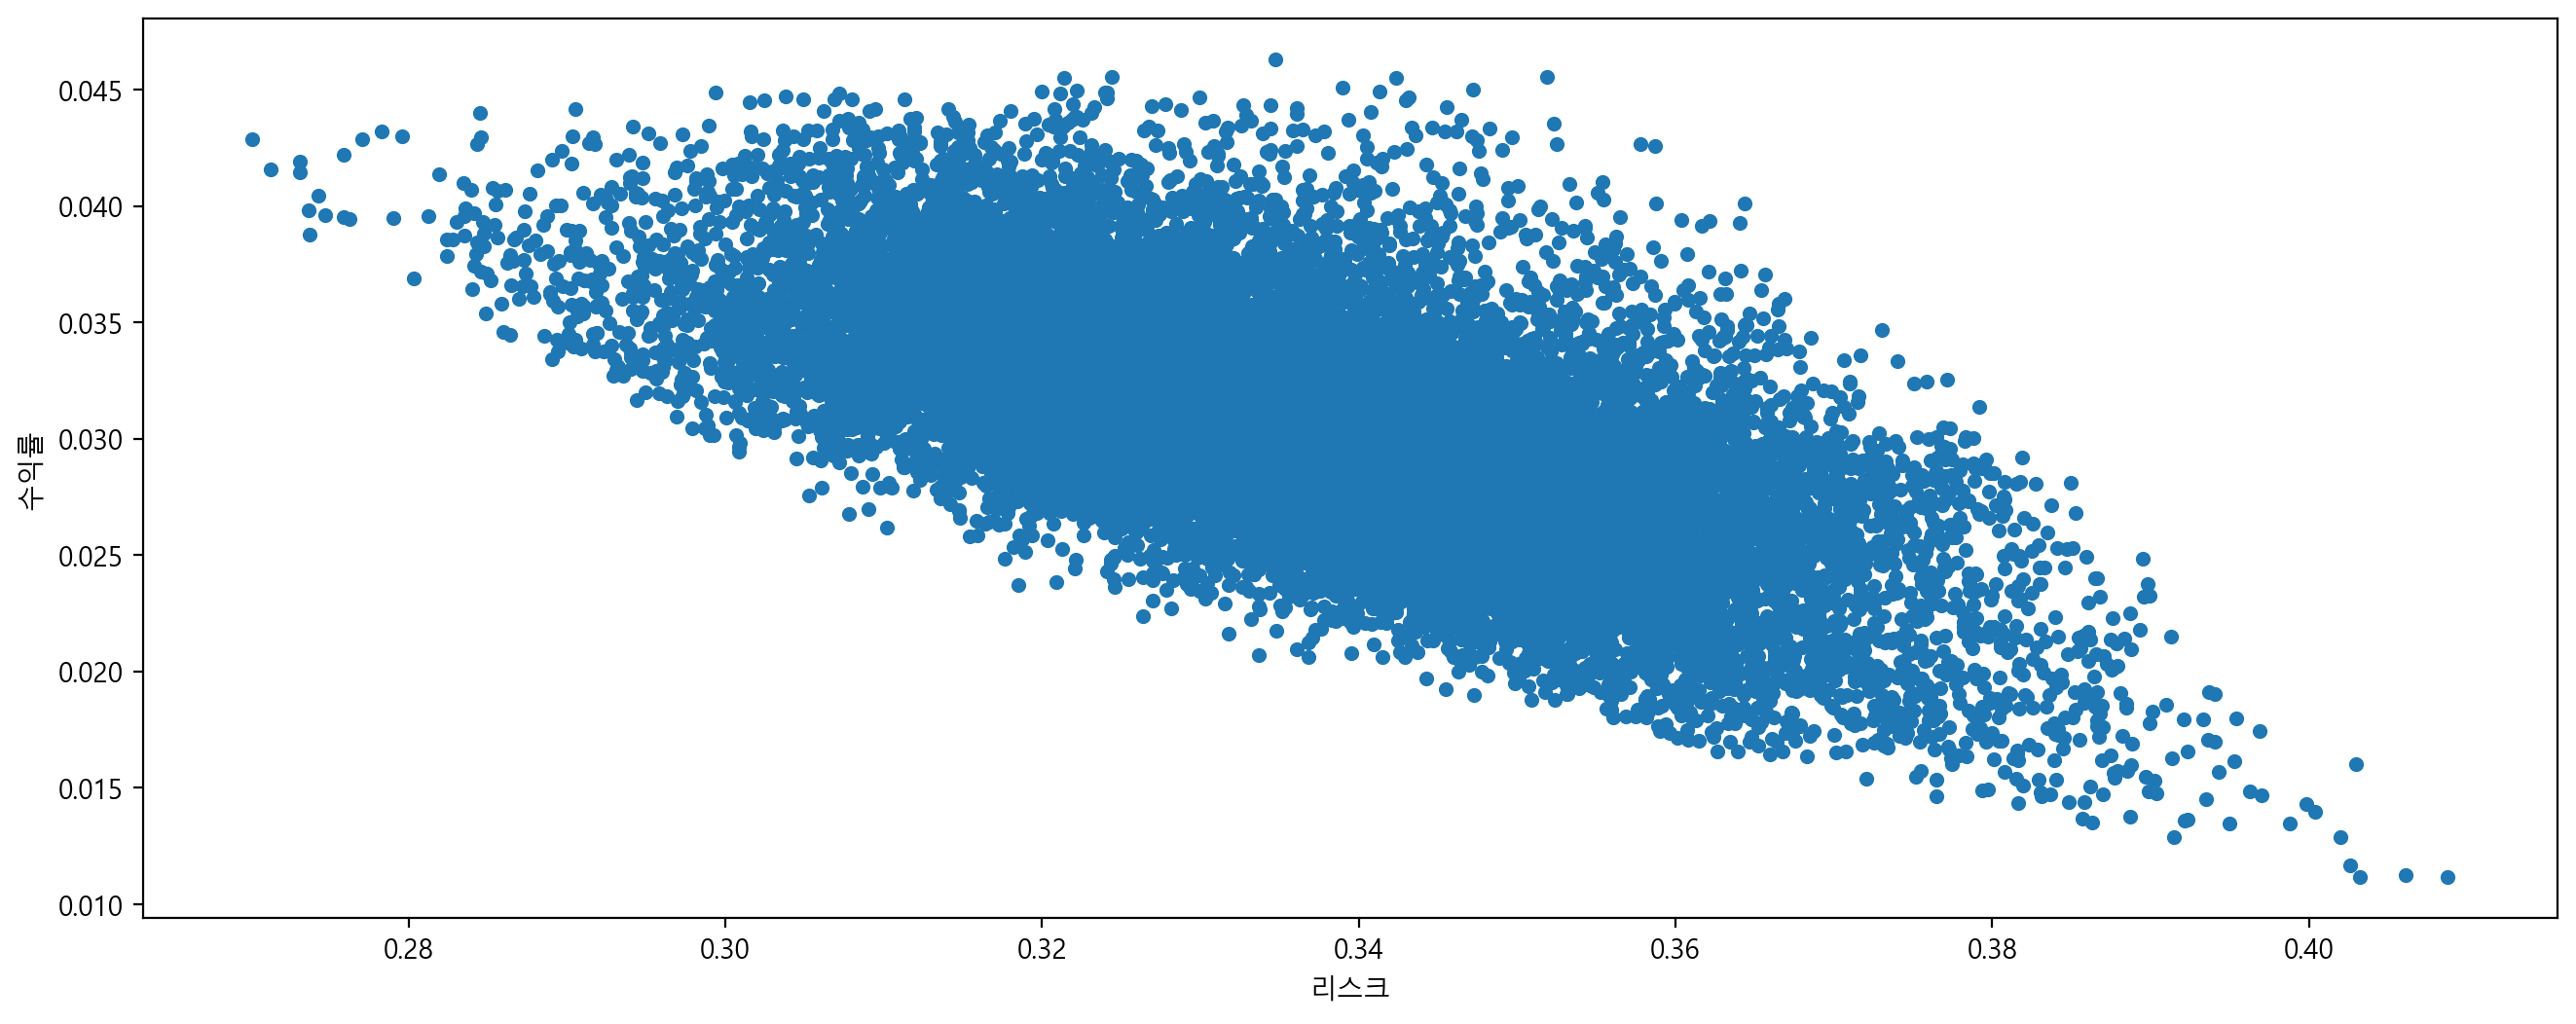

In [22]:
# 데이터프레임 시각화 하기

포트폴리오.plot.scatter(x = '리스크', y = '수익률', figsize = (16, 6))

In [24]:
# 수익률기준으로 가장 높을 때로 정렬

포트폴리오.sort_values('수익률', ascending = False)   

Name,NAVER,고려아연,두산밥캣,삼성전자,수익률,리스크
3283,0.789835,0.012795,0.002693,0.194677,0.046278,0.334739
2675,0.667919,0.012946,0.009396,0.309739,0.045562,0.324401
17058,0.911012,0.004401,0.042415,0.042172,0.045538,0.351863
11862,0.838045,0.048190,0.009526,0.104239,0.045503,0.342356
11493,0.633721,0.000398,0.015067,0.350814,0.045487,0.321378
...,...,...,...,...,...,...
19169,0.062343,0.085010,0.833900,0.018747,0.012875,0.401995
112,0.016816,0.078761,0.867068,0.037355,0.011665,0.402612
11142,0.012563,0.019908,0.912991,0.054538,0.011249,0.406088
2027,0.003659,0.083847,0.876922,0.035573,0.011164,0.403227


In [25]:
# 리스크를 기준으로 가장 낮은 순으로 정렬

포트폴리오.sort_values('리스크')

Name,NAVER,고려아연,두산밥캣,삼성전자,수익률,리스크
18409,0.074055,0.024312,0.013529,0.888104,0.042851,0.270149
13747,0.049884,0.079255,0.015275,0.855586,0.041568,0.271312
9449,0.052576,0.052029,0.035154,0.860241,0.041442,0.273141
9784,0.061553,0.020018,0.041582,0.876847,0.041909,0.273161
11699,0.015668,0.126259,0.033637,0.824436,0.039827,0.273703
...,...,...,...,...,...,...
112,0.016816,0.078761,0.867068,0.037355,0.011665,0.402612
11188,0.176348,0.015498,0.797877,0.010277,0.016008,0.402991
2027,0.003659,0.083847,0.876922,0.035573,0.011164,0.403227
11142,0.012563,0.019908,0.912991,0.054538,0.011249,0.406088


In [26]:
# 임의의 기준 -> 리스크가 0.3보다 큰 경우를 따로 보고 싶을 때 

포트폴리오[포트폴리오['리스크'] > 0.3]

Name,NAVER,고려아연,두산밥캣,삼성전자,수익률,리스크
0,0.220706,0.192951,0.508378,0.077965,0.022665,0.371625
1,0.165581,0.121626,0.325872,0.386922,0.030293,0.333579
2,0.275103,0.408989,0.000079,0.315829,0.036220,0.308880
3,0.310214,0.291654,0.155660,0.242472,0.033325,0.329992
4,0.262994,0.235459,0.230962,0.270585,0.031659,0.334238
...,...,...,...,...,...,...
19995,0.332298,0.271493,0.179972,0.216237,0.032975,0.334740
19996,0.238511,0.171313,0.262609,0.327568,0.031772,0.333266
19997,0.393323,0.341201,0.177967,0.087510,0.031855,0.344127
19998,0.455818,0.432461,0.060032,0.051689,0.034352,0.336592


In [28]:
# 샤프지수 : 리스크 대비 수익률이 얼마나 좋은가를 볼 때

포트폴리오['샤프지수'] = 포트폴리오['수익률'] / 포트폴리오['리스크']
포트폴리오.head()

Name,NAVER,고려아연,두산밥캣,삼성전자,수익률,리스크,샤프지수
0,0.220706,0.192951,0.508378,0.077965,0.022665,0.371625,0.060989
1,0.165581,0.121626,0.325872,0.386922,0.030293,0.333579,0.090812
2,0.275103,0.408989,0.000079,0.315829,0.036220,0.308880,0.117263
3,0.310214,0.291654,0.155660,0.242472,0.033325,0.329992,0.100987
4,0.262994,0.235459,0.230962,0.270585,0.031659,0.334238,0.094721


In [29]:
포트폴리오.sort_values('샤프지수', ascending = False)

Name,NAVER,고려아연,두산밥캣,삼성전자,수익률,리스크,샤프지수
18409,0.074055,0.024312,0.013529,0.888104,0.042851,0.270149,0.158618
13444,0.154228,0.000725,0.026224,0.818823,0.043206,0.278301,0.155248
13552,0.133457,0.014185,0.026056,0.826303,0.042854,0.277103,0.154650
12774,0.246737,0.016449,0.005033,0.731782,0.043988,0.284512,0.154607
16574,0.160737,0.009620,0.027549,0.802093,0.043002,0.279629,0.153784
...,...,...,...,...,...,...,...
19169,0.062343,0.085010,0.833900,0.018747,0.012875,0.401995,0.032028
112,0.016816,0.078761,0.867068,0.037355,0.011665,0.402612,0.028972
11142,0.012563,0.019908,0.912991,0.054538,0.011249,0.406088,0.027702
2027,0.003659,0.083847,0.876922,0.035573,0.011164,0.403227,0.027686


## [실습]

In [30]:
cor_list = ['SK하이닉스', 'LG화학', '셀트리온', '기아']

In [31]:
cor_df = df_krx[df_krx['Name'].isin(cor_list)]
cor_df

,Code,Name
2,000660,SK하이닉스
4,051910,LG화학
9,000270,기아
12,068270,셀트리온


In [32]:
result = pd.DataFrame()
for idx, values in cor_df.iterrows():
    df = fdr.DataReader(values['Code'], '2018')
    df['Name'] = values['Name']
    result = pd.concat([result, df])

In [33]:
result['Name'].unique()

array(['SK하이닉스', 'LG화학', '기아', '셀트리온'], dtype=object)

In [34]:
result.head()

,Open,High,Low,Close,Volume,Change,Name
Date,,,,,,,
2018-01-02,77300,77300,76200,76600,2014838,0.001307,SK하이닉스
2018-01-03,78100,78800,77300,77700,3097644,0.014360,SK하이닉스
2018-01-04,78700,79700,77100,77100,3729328,-0.007722,SK하이닉스
2018-01-05,78400,79400,78300,79300,3395065,0.028534,SK하이닉스
2018-01-08,79500,80000,77400,78200,2960495,-0.013871,SK하이닉스


In [35]:
Changes = pd.pivot_table(index = result.index, columns = 'Name', values = 'Change', data = result)
Changes

Name,LG화학,SK하이닉스,기아,셀트리온
Date,,,,
2018-01-02,0.014815,0.001307,-0.020896,0.021709
2018-01-03,-0.003650,0.014360,-0.006098,0.092075
2018-01-04,-0.034188,-0.007722,-0.032209,0.013381
2018-01-05,0.024020,0.028534,0.012678,0.067598
2018-01-08,0.048148,-0.013871,0.014085,0.133381
...,...,...,...,...
2023-02-10,-0.010294,-0.009534,0.009763,-0.019324
2023-02-13,-0.004458,-0.031016,0.011050,-0.008005
2023-02-14,0.008955,0.030905,0.004098,0.001862


In [36]:
# 누적수익률

cum_ror_df = (Changes + 1).cumprod() - 1
cum_ror = cum_ror_df.iloc[-1]
cum_ror

Name
LG화학      0.785185
SK하이닉스    0.216993
기아        1.265672
셀트리온     -0.222554
Name: 2023-02-16 00:00:00, dtype: float64

In [37]:
# 투자년도를 계산

start_date = Changes.index[0]
end_date = Changes.index[-1]

year = (end_date - start_date).days / 365            # 휴일까지 포함하므로 365를 나눠줌
print(year)

5.126027397260274


In [38]:
# 연복리수익률

CAGR = (1 + cum_ror) ** (1 / year) - 1
print(CAGR)

Name
LG화학      0.119693
SK하이닉스    0.039054
기아        0.172986
셀트리온     -0.047924
Name: 2023-02-16 00:00:00, dtype: float64


In [39]:
# 연표준편차

daily_std = Changes.std()                # 일 표준편차
annual_std = daily_std * np.sqrt(252)    # 연 표준편차
print(daily_std, annual_std)

Name
LG화학      0.026938
SK하이닉스    0.023005
기아        0.022423
셀트리온      0.030045
dtype: float64 Name
LG화학      0.427630
SK하이닉스    0.365192
기아        0.355958
셀트리온      0.476954
dtype: float64


In [40]:
포트폴리오_비중_리스트 = []
포트폴리오_수익률_리스트 = []
포트폴리오_리스크_리스트 = []

import numpy as np

for i in range(20000):
    # 포트폴리오의 비중
    weights = np.random.random(4)
    비중 = weights / weights.sum()
    # 포트폴리오의 수익률
    포트폴리오_수익률 = (CAGR * 비중).sum()
    # 포트폴리오의 리스크
    리스크 = (annual_std * 비중).sum()
    
    포트폴리오_비중_리스트.append(비중)
    포트폴리오_수익률_리스트.append(포트폴리오_수익률)
    포트폴리오_리스크_리스트.append(리스크)


In [41]:
# 각 종목을 데이터프레임에 넣기

포트폴리오 = pd.DataFrame(포트폴리오_비중_리스트)
포트폴리오.columns = Changes.columns             # 포트폴리오 데이터프레임 columns명을 종목명으로 변경하기
포트폴리오.head()

Name,LG화학,SK하이닉스,기아,셀트리온
0,0.302825,0.079067,0.193439,0.424669
1,0.410129,0.204354,0.110904,0.274613
2,0.589755,0.026086,0.309265,0.074894
3,0.415278,0.256921,0.278487,0.049313
4,0.142228,0.291655,0.425018,0.141099


In [42]:
# 포트폴리오수익률과 리스크 데이터프레임에 넣기

포트폴리오['수익률'] = 포트폴리오_수익률_리스트
포트폴리오['리스크'] = 포트폴리오_리스크_리스트
포트폴리오.head()

Name,LG화학,SK하이닉스,기아,셀트리온,수익률,리스크
0,0.302825,0.079067,0.193439,0.424669,0.052444,0.429775
1,0.410129,0.204354,0.110904,0.274613,0.063095,0.420467
2,0.589755,0.026086,0.309265,0.074894,0.121518,0.407530
3,0.415278,0.256921,0.278487,0.049313,0.105551,0.394061
4,0.142228,0.291655,0.425018,0.141099,0.095174,0.385917


<AxesSubplot: xlabel='리스크', ylabel='수익률'>

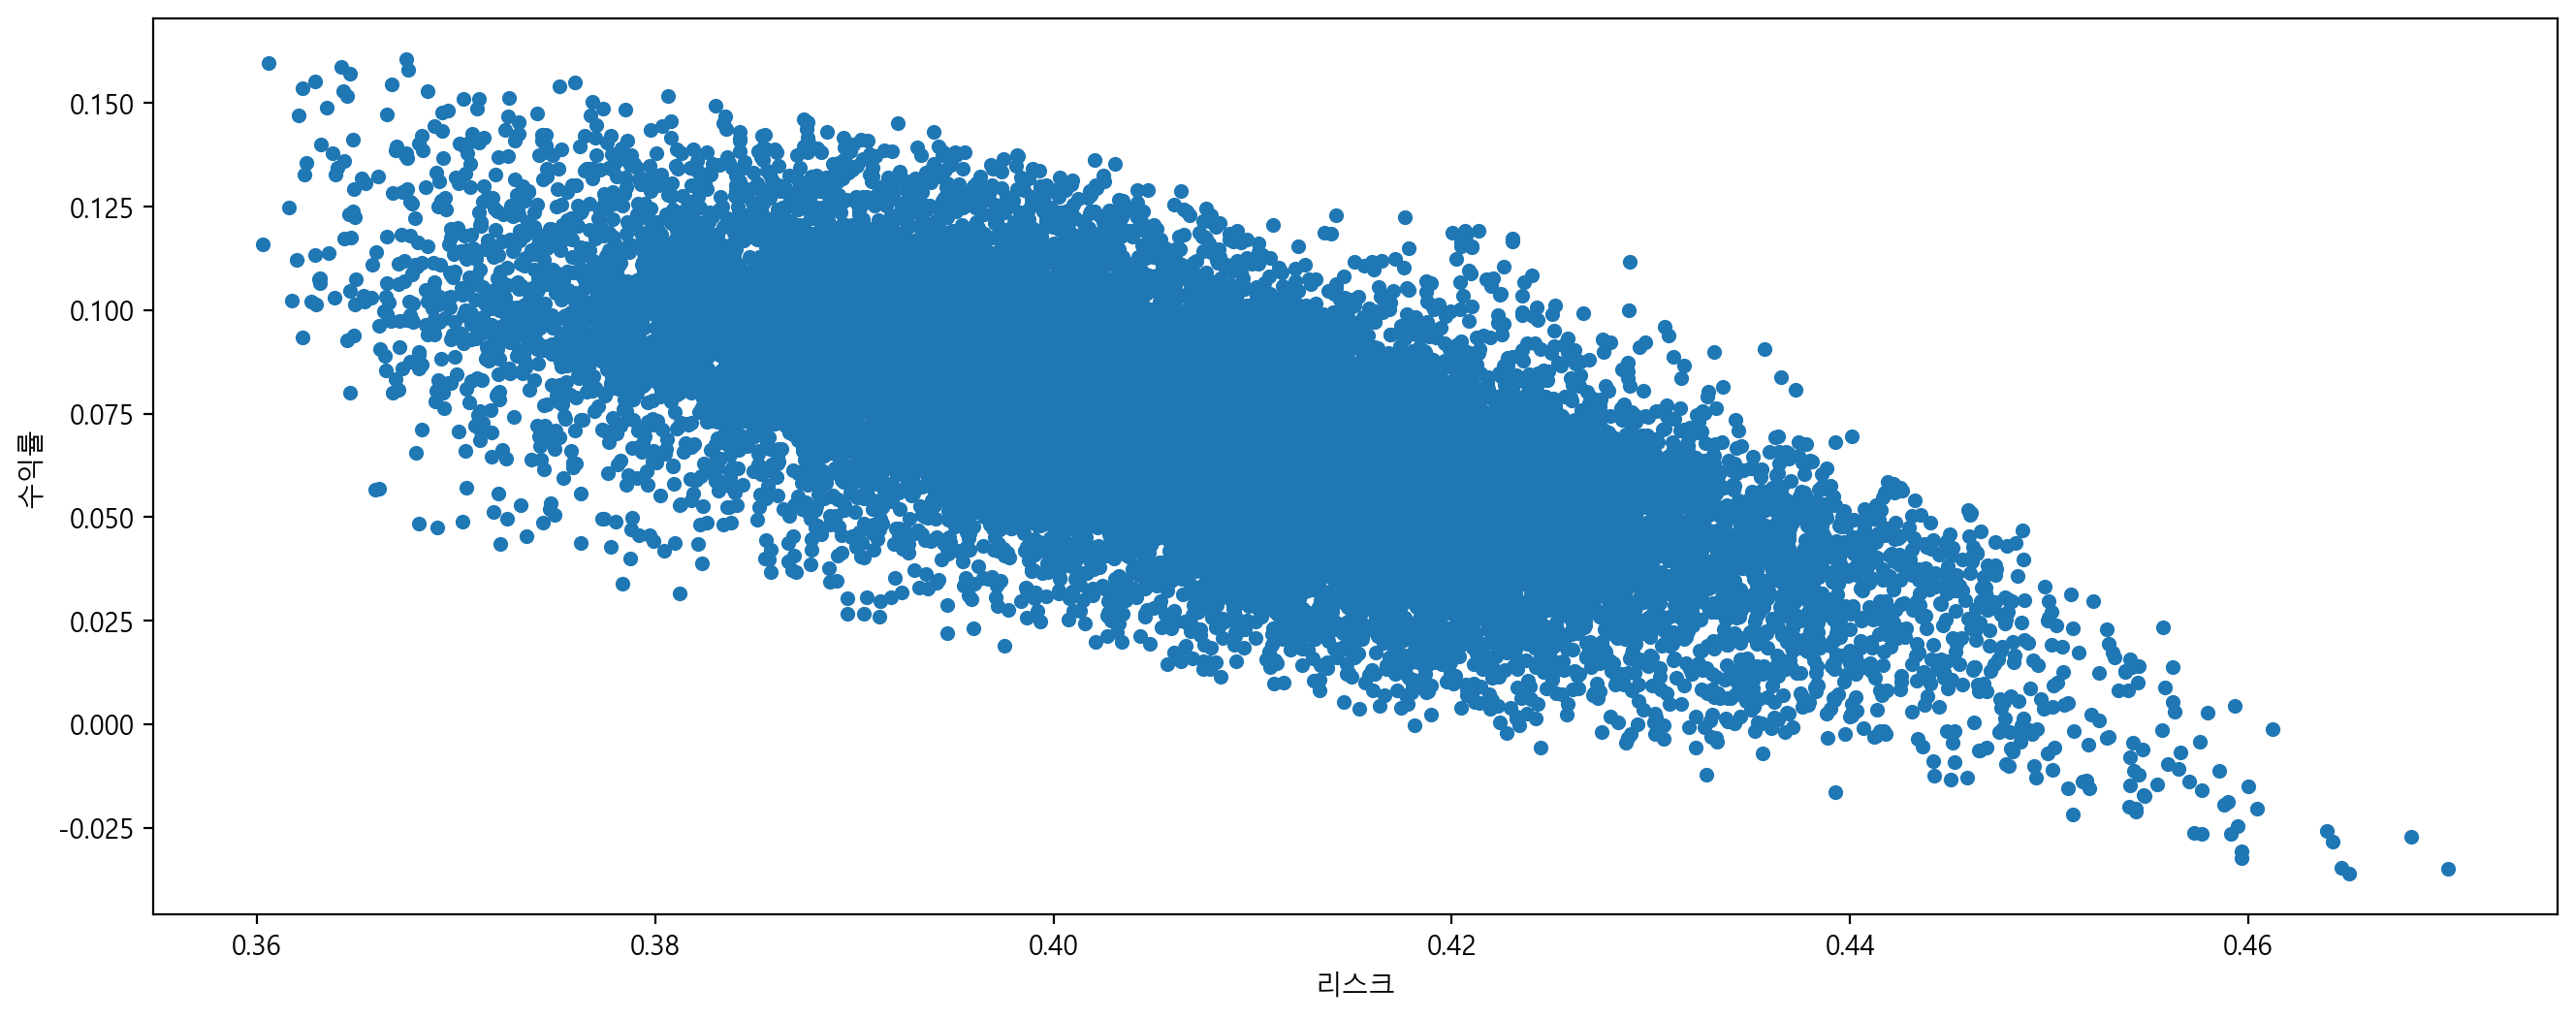

In [43]:
# 데이터프레임 시각화 하기

포트폴리오.plot.scatter(x = '리스크', y = '수익률', figsize = (16, 6))

In [44]:
# 수익률기준으로 가장 높을 때로 정렬

포트폴리오.sort_values('수익률', ascending = False)   

Name,LG화학,SK하이닉스,기아,셀트리온,수익률,리스크
9387,0.130984,0.013248,0.838875,0.016893,0.160499,0.367512
8293,0.021525,0.055708,0.901627,0.021140,0.159708,0.360573
12120,0.052309,0.027164,0.885154,0.035373,0.158746,0.364238
5643,0.095385,0.009499,0.856137,0.038979,0.158020,0.367599
9770,0.036241,0.024149,0.890839,0.048771,0.157046,0.364680
...,...,...,...,...,...,...
14998,0.024979,0.140089,0.003314,0.831617,-0.030820,0.459664
19047,0.000747,0.138357,0.014998,0.845898,-0.032451,0.459639
256,0.024319,0.095139,0.003616,0.876926,-0.034774,0.464684
2042,0.043397,0.025069,0.016288,0.915245,-0.034871,0.470041


In [45]:
# 리스크를 기준으로 가장 낮은 순으로 정렬

포트폴리오.sort_values('리스크')

Name,LG화학,SK하이닉스,기아,셀트리온,수익률,리스크
17876,0.003797,0.422144,0.572828,0.001231,0.115973,0.360277
8293,0.021525,0.055708,0.901627,0.021140,0.159708,0.360573
18654,0.015147,0.333694,0.639022,0.012137,0.124805,0.361593
16463,0.012313,0.521386,0.465505,0.000796,0.102324,0.361751
14174,0.024922,0.441562,0.532255,0.001261,0.112240,0.361974
...,...,...,...,...,...,...
5029,0.000415,0.032294,0.075050,0.892241,-0.028466,0.464243
256,0.024319,0.095139,0.003616,0.876926,-0.034774,0.464684
15109,0.007192,0.089963,0.012086,0.890759,-0.036224,0.465082
712,0.076211,0.010329,0.031870,0.881590,-0.027211,0.468184


In [26]:
# 임의의 기준 -> 리스크가 0.3보다 큰 경우를 따로 보고 싶을 때 

포트폴리오[포트폴리오['리스크'] > 0.3]

Name,NAVER,고려아연,두산밥캣,삼성전자,수익률,리스크
0,0.220706,0.192951,0.508378,0.077965,0.022665,0.371625
1,0.165581,0.121626,0.325872,0.386922,0.030293,0.333579
2,0.275103,0.408989,0.000079,0.315829,0.036220,0.308880
3,0.310214,0.291654,0.155660,0.242472,0.033325,0.329992
4,0.262994,0.235459,0.230962,0.270585,0.031659,0.334238
...,...,...,...,...,...,...
19995,0.332298,0.271493,0.179972,0.216237,0.032975,0.334740
19996,0.238511,0.171313,0.262609,0.327568,0.031772,0.333266
19997,0.393323,0.341201,0.177967,0.087510,0.031855,0.344127
19998,0.455818,0.432461,0.060032,0.051689,0.034352,0.336592


In [46]:
# 샤프지수 : 리스크 대비 수익률이 얼마나 좋은가를 볼 때

포트폴리오['샤프지수'] = 포트폴리오['수익률'] / 포트폴리오['리스크']
포트폴리오.head()

Name,LG화학,SK하이닉스,기아,셀트리온,수익률,리스크,샤프지수
0,0.302825,0.079067,0.193439,0.424669,0.052444,0.429775,0.122027
1,0.410129,0.204354,0.110904,0.274613,0.063095,0.420467,0.150059
2,0.589755,0.026086,0.309265,0.074894,0.121518,0.407530,0.298181
3,0.415278,0.256921,0.278487,0.049313,0.105551,0.394061,0.267855
4,0.142228,0.291655,0.425018,0.141099,0.095174,0.385917,0.246618


In [47]:
포트폴리오.sort_values('샤프지수', ascending = False)

Name,LG화학,SK하이닉스,기아,셀트리온,수익률,리스크,샤프지수
8293,0.021525,0.055708,0.901627,0.021140,0.159708,0.360573,0.442928
9387,0.130984,0.013248,0.838875,0.016893,0.160499,0.367512,0.436718
12120,0.052309,0.027164,0.885154,0.035373,0.158746,0.364238,0.435830
9770,0.036241,0.024149,0.890839,0.048771,0.157046,0.364680,0.430642
5643,0.095385,0.009499,0.856137,0.038979,0.158020,0.367599,0.429870
...,...,...,...,...,...,...,...
14998,0.024979,0.140089,0.003314,0.831617,-0.030820,0.459664,-0.067049
19047,0.000747,0.138357,0.014998,0.845898,-0.032451,0.459639,-0.070602
2042,0.043397,0.025069,0.016288,0.915245,-0.034871,0.470041,-0.074187
256,0.024319,0.095139,0.003616,0.876926,-0.034774,0.464684,-0.074833


# 투자전략

## 이동평균 매매

In [48]:
!pip install finance-datareader

In [49]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr

### 이동평균선을 활용한 매매
 - 종가의 이동평균선 window-size가 작은 것 -> 빠르게 움직인다. (빠른 선)
 - 종가의 이동평균선 window-size가 큰 것 -> 느리게 움직인다. (느린 선)
 - 종가 빠른 선 -> 느린 선을 상향 돌파했다 -> 

In [89]:
# 마이크로소프트사의 종가만 가져온 데이터

df = fdr.DataReader('MSFT', '2020')[['Close']]
df.head()

,Close
Date,
2020-01-02,160.619995
2020-01-03,158.619995
2020-01-06,159.029999
2020-01-07,157.580002
2020-01-08,160.089996


In [90]:
# 느린, 빠른 이동평균을 구하여 df에 컬럼 추가

fast_window_size = 10
slow_window_size = 30
df['MA_fast'] = df['Close'].rolling(fast_window_size, min_periods = 1).mean()           # min_periods = 1 -> 한개만 모여도 rolling을 한다. / 쓰지 않을 경우 지정 일 전까지는 NaN값이 나옴
df['MA_slow'] = df['Close'].rolling(slow_window_size, min_periods = 1).mean()
df.head(30)

,Close,MA_fast,MA_slow
Date,,,
2020-01-02,160.619995,160.619995,160.619995
2020-01-03,158.619995,159.619995,159.619995
2020-01-06,159.029999,159.423330,159.423330
2020-01-07,157.580002,158.962498,158.962498
2020-01-08,160.089996,159.187997,159.187997
2020-01-09,162.089996,159.671664,159.671664
2020-01-10,161.339996,159.909997,159.909997
2020-01-13,163.279999,160.331247,160.331247
2020-01-14,162.130005,160.531109,160.531109


<AxesSubplot: xlabel='Date'>

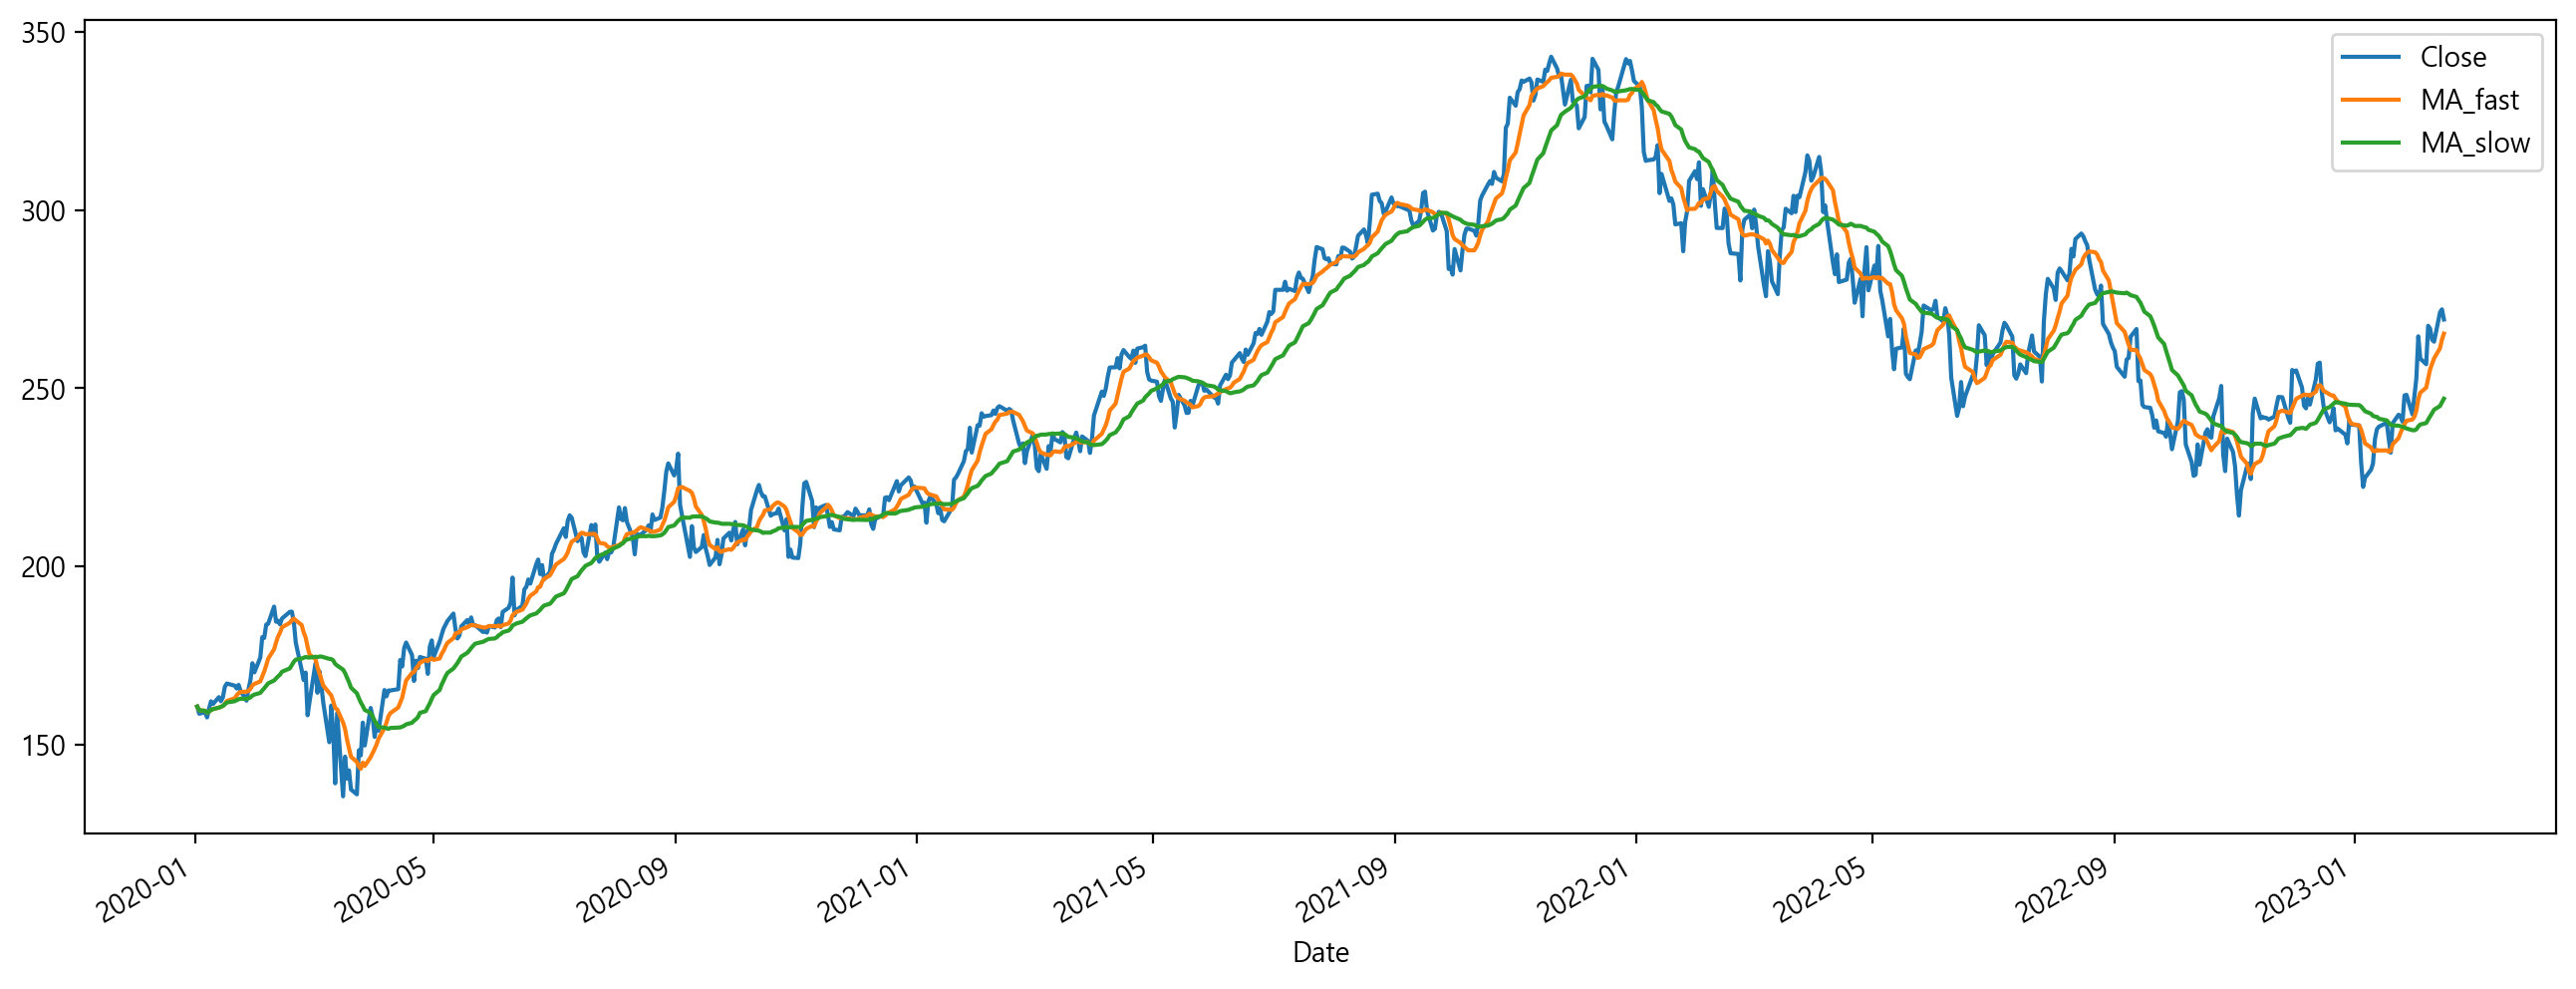

In [91]:
# 종가 빠른 선 -> 느린 선을 상향 돌파했다의 의미 = 상승 추세로 전환(positive)
# 종가 빠른 선 -> 느린 선을 하향 돌파했다의 의미 = 하향 추세로 전환(negative)

df.plot(figsize = (16, 6))

In [92]:
# 빠른선이 느린선보다 위에 있는 경우 True, 아니면 False를 'is_hold'컬럼에 값 추가

df['is_hold'] = np.where(df['MA_fast'] >= df['MA_slow'], True, False)

In [93]:
df

,Close,MA_fast,MA_slow,is_hold
Date,,,,
2020-01-02,160.619995,160.619995,160.619995,True
2020-01-03,158.619995,159.619995,159.619995,True
2020-01-06,159.029999,159.423330,159.423330,True
2020-01-07,157.580002,158.962498,158.962498,True
2020-01-08,160.089996,159.187997,159.187997,True
...,...,...,...,...
2023-02-09,263.619995,256.906001,243.045333,True
2023-02-10,263.100006,258.400002,243.997667,True
2023-02-13,271.320007,261.261002,245.008001,True


In [94]:
# 매수 신호 -> 다음 날 매수

df['NextDay_Close'] = df['Close'].shift(-1)
df

,Close,MA_fast,MA_slow,is_hold,NextDay_Close
Date,,,,,
2020-01-02,160.619995,160.619995,160.619995,True,158.619995
2020-01-03,158.619995,159.619995,159.619995,True,159.029999
2020-01-06,159.029999,159.423330,159.423330,True,157.580002
2020-01-07,157.580002,158.962498,158.962498,True,160.089996
2020-01-08,160.089996,159.187997,159.187997,True,162.089996
...,...,...,...,...,...
2023-02-09,263.619995,256.906001,243.045333,True,263.100006
2023-02-10,263.100006,258.400002,243.997667,True,271.320007
2023-02-13,271.320007,261.261002,245.008001,True,272.170013


In [95]:
# is_hold == True일 때 return(df['NextDay_Close'] - df['Close'], 내일 종가에서 오늘 종가를 뺀 수익)을 df['return']에 대입

df['return'] = np.where(df['is_hold'] == True, df['NextDay_Close'] - df['Close'], None)
df.head()

,Close,MA_fast,MA_slow,is_hold,NextDay_Close,return
Date,,,,,,
2020-01-02,160.619995,160.619995,160.619995,True,158.619995,-2.0
2020-01-03,158.619995,159.619995,159.619995,True,159.029999,0.410004
2020-01-06,159.029999,159.423330,159.423330,True,157.580002,-1.449997
2020-01-07,157.580002,158.962498,158.962498,True,160.089996,2.509994
2020-01-08,160.089996,159.187997,159.187997,True,162.089996,2.0


In [96]:
# cumsum()을 이용하여 누적 수익을 구하여 새로운 컬럼에 대입

df['cum_return'] = df['return'].cumsum()
df.tail()

,Close,MA_fast,MA_slow,is_hold,NextDay_Close,return,cum_return
Date,,,,,,,
2023-02-09,263.619995,256.906001,243.045333,True,263.100006,-0.519989,27.559998
2023-02-10,263.100006,258.400002,243.997667,True,271.320007,8.220001,35.779999
2023-02-13,271.320007,261.261002,245.008001,True,272.170013,0.850006,36.630005
2023-02-14,272.170013,263.697003,246.086334,True,269.320007,-2.850006,33.779999
2023-02-15,269.320007,265.354004,247.077668,True,NaN,NaN,NaN


In [97]:
# 확인

df[df['is_hold'] == True]

,Close,MA_fast,MA_slow,is_hold,NextDay_Close,return,cum_return
Date,,,,,,,
2020-01-02,160.619995,160.619995,160.619995,True,158.619995,-2.0,-2.0
2020-01-03,158.619995,159.619995,159.619995,True,159.029999,0.410004,-1.589996
2020-01-06,159.029999,159.423330,159.423330,True,157.580002,-1.449997,-3.039993
2020-01-07,157.580002,158.962498,158.962498,True,160.089996,2.509994,-0.529999
2020-01-08,160.089996,159.187997,159.187997,True,162.089996,2.0,1.470001
...,...,...,...,...,...,...,...
2023-02-09,263.619995,256.906001,243.045333,True,263.100006,-0.519989,27.559998
2023-02-10,263.100006,258.400002,243.997667,True,271.320007,8.220001,35.779999
2023-02-13,271.320007,261.261002,245.008001,True,272.170013,0.850006,36.630005


### 이동평균 매매 시각화

In [98]:
df

,Close,MA_fast,MA_slow,is_hold,NextDay_Close,return,cum_return
Date,,,,,,,
2020-01-02,160.619995,160.619995,160.619995,True,158.619995,-2.0,-2.0
2020-01-03,158.619995,159.619995,159.619995,True,159.029999,0.410004,-1.589996
2020-01-06,159.029999,159.423330,159.423330,True,157.580002,-1.449997,-3.039993
2020-01-07,157.580002,158.962498,158.962498,True,160.089996,2.509994,-0.529999
2020-01-08,160.089996,159.187997,159.187997,True,162.089996,2.0,1.470001
...,...,...,...,...,...,...,...
2023-02-09,263.619995,256.906001,243.045333,True,263.100006,-0.519989,27.559998
2023-02-10,263.100006,258.400002,243.997667,True,271.320007,8.220001,35.779999
2023-02-13,271.320007,261.261002,245.008001,True,272.170013,0.850006,36.630005


In [103]:
# 매수, 매도 신호가 온 날짜를 어떻게 계산할 것인가? 
# 매수 신호 : 빠른 선 -> 느린 선을 상향 돌파 할 때
# 매도 신호 : 빠른 선 -> 느린 선을 하향 돌파 할 때
# 정확한 돌파 시점을 구하는 Logic?
# 돌파 시점은 곧 차이가 음수에서 양수 또는 양수에서 음수로 변하는 시점

In [107]:
test = df.copy()

In [108]:
test['MA_diff'] = test['MA_fast'] - test['MA_slow']
test

,Close,MA_fast,MA_slow,is_hold,NextDay_Close,return,cum_return,MA_diff
Date,,,,,,,,
2020-01-02,160.619995,160.619995,160.619995,True,158.619995,-2.0,-2.0,0.000000
2020-01-03,158.619995,159.619995,159.619995,True,159.029999,0.410004,-1.589996,0.000000
2020-01-06,159.029999,159.423330,159.423330,True,157.580002,-1.449997,-3.039993,0.000000
2020-01-07,157.580002,158.962498,158.962498,True,160.089996,2.509994,-0.529999,0.000000
2020-01-08,160.089996,159.187997,159.187997,True,162.089996,2.0,1.470001,0.000000
...,...,...,...,...,...,...,...,...
2023-02-09,263.619995,256.906001,243.045333,True,263.100006,-0.519989,27.559998,13.860668
2023-02-10,263.100006,258.400002,243.997667,True,271.320007,8.220001,35.779999,14.402335
2023-02-13,271.320007,261.261002,245.008001,True,272.170013,0.850006,36.630005,16.253001


In [109]:
# test['Check'] 컬럼에 np.where로 test['MA_diff'] > 0 에 만족하면 'pos'값을, 아닌 경우 'neg'를 집어 넣는다.

test['Check'] = np.where(test['MA_diff'] > 0, 'pos', 'neg') 
test.head()

,Close,MA_fast,MA_slow,is_hold,NextDay_Close,return,cum_return,MA_diff,Check
Date,,,,,,,,,
2020-01-02,160.619995,160.619995,160.619995,True,158.619995,-2.0,-2.0,0.0,neg
2020-01-03,158.619995,159.619995,159.619995,True,159.029999,0.410004,-1.589996,0.0,neg
2020-01-06,159.029999,159.423330,159.423330,True,157.580002,-1.449997,-3.039993,0.0,neg
2020-01-07,157.580002,158.962498,158.962498,True,160.089996,2.509994,-0.529999,0.0,neg
2020-01-08,160.089996,159.187997,159.187997,True,162.089996,2.0,1.470001,0.0,neg


In [110]:
signal_date = test[test['Check'] != test['Check'].shift(1)].index
signal_date

DatetimeIndex(['2020-01-02', '2020-01-16', '2020-03-02', '2020-04-07',
               '2020-09-15', '2020-10-12', '2020-10-30', '2020-11-12',
               '2020-11-23', '2020-11-24', '2020-12-14', '2020-12-18',
               '2021-01-14', '2021-01-22', '2021-03-03', '2021-03-29',
               '2021-03-30', '2021-03-31', '2021-05-10', '2021-06-07',
               '2021-09-27', '2021-10-18', '2021-12-07', '2021-12-31',
               '2022-01-10', '2022-03-24', '2022-04-18', '2022-06-08',
               '2022-06-13', '2022-07-07', '2022-08-31', '2022-10-28',
               '2022-11-01', '2022-11-17', '2022-12-27', '2023-01-26'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [112]:
# signal_date = test[test['Check'] != test['Check'].shift(1)].index

test.loc[signal_date, 'signal'] = True
test.head(20)

,Close,MA_fast,MA_slow,is_hold,NextDay_Close,return,cum_return,MA_diff,Check,signal
Date,,,,,,,,,,
2020-01-02,160.619995,160.619995,160.619995,True,158.619995,-2.0,-2.0,0.000000,neg,True
2020-01-03,158.619995,159.619995,159.619995,True,159.029999,0.410004,-1.589996,0.000000,neg,NaN
2020-01-06,159.029999,159.423330,159.423330,True,157.580002,-1.449997,-3.039993,0.000000,neg,NaN
2020-01-07,157.580002,158.962498,158.962498,True,160.089996,2.509994,-0.529999,0.000000,neg,NaN
2020-01-08,160.089996,159.187997,159.187997,True,162.089996,2.0,1.470001,0.000000,neg,NaN
2020-01-09,162.089996,159.671664,159.671664,True,161.339996,-0.75,0.720001,0.000000,neg,NaN
2020-01-10,161.339996,159.909997,159.909997,True,163.279999,1.940003,2.660004,0.000000,neg,NaN
2020-01-13,163.279999,160.331247,160.331247,True,162.130005,-1.149994,1.51001,0.000000,neg,NaN
2020-01-14,162.130005,160.531109,160.531109,True,163.179993,1.049988,2.559998,0.000000,neg,NaN


In [113]:
# 알고 있는 정보 : 매수, 매도 신호가 온 날 -> 매수? 매도?

test['SELL'] = np.where((test['Check'] == 'neg') & (test['signal'] == True), True, None)   # 매도 / 
test['BUY'] = np.where((test['Check'] == 'pos') & (test['signal'] == True), True, None)    # 매수

In [114]:
test[test['SELL'] == True]

,Close,MA_fast,MA_slow,is_hold,NextDay_Close,return,cum_return,MA_diff,Check,signal,SELL,BUY
Date,,,,,,,,,,,,
2020-01-02,160.619995,160.619995,160.619995,True,158.619995,-2.0,-2.0,0.000000,neg,True,True,None
2020-03-02,172.789993,173.962997,174.610333,False,164.509995,None,NaN,-0.647335,neg,True,True,None
2020-09-15,208.779999,212.800999,213.763000,False,205.050003,None,NaN,-0.962000,neg,True,True,None
2020-10-30,202.470001,210.798999,211.072667,False,202.330002,None,NaN,-0.273668,neg,True,True,None
2020-11-23,210.110001,213.520000,213.892666,False,213.860001,None,NaN,-0.372666,neg,True,True,None
2020-12-14,214.199997,214.025999,214.101333,False,214.130005,None,NaN,-0.075333,neg,True,True,None
2021-01-14,213.020004,216.994998,217.550332,False,212.649994,None,NaN,-0.555334,neg,True,True,None
2021-03-03,227.559998,234.683000,236.685000,False,226.729996,None,NaN,-2.001999,neg,True,True,None
2021-03-30,231.850006,234.305002,234.380001,False,235.770004,None,NaN,-0.074999,neg,True,True,None


In [115]:
# 판매, 구매할 날짜들을 변수에 대입

BUY_DATE = test[test['BUY'] == True].index
SELL_DATE = test[test['SELL'] == True].index

In [120]:
test['cum_return'] = test['cum_return'].fillna(method = 'ffill')

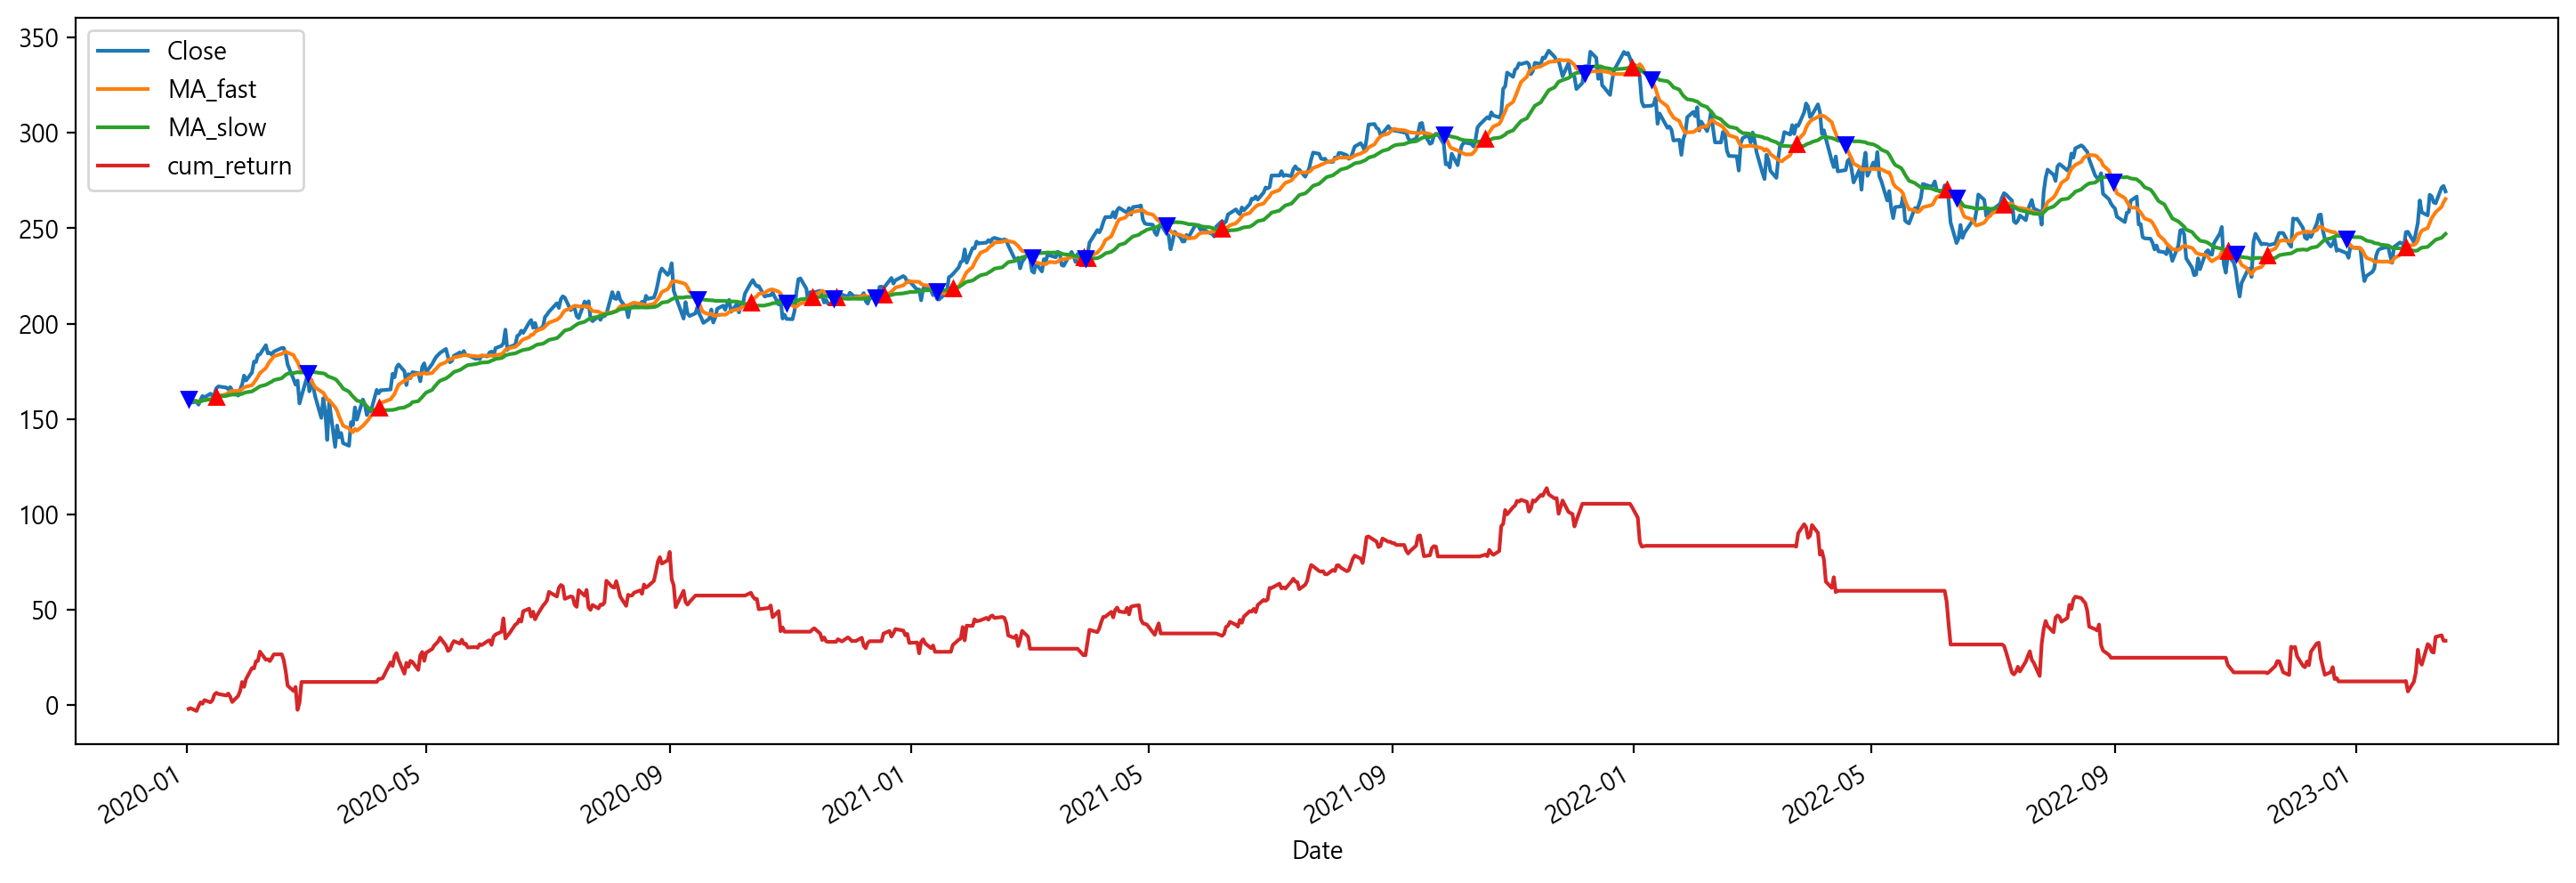

In [121]:
# 종가, 빠른 선, 느린 선, 누적 수익을 시각화

import matplotlib.pyplot as plt

test[['Close', 'MA_fast', 'MA_slow', 'cum_return']].plot(figsize = (18, 6))
plt.plot(BUY_DATE, test.loc[BUY_DATE, 'MA_fast'], 'r^')           # 상승(빠른선이 느린선 상승돌파) - 위로 화살표모양의 빨간색 선
plt.plot(SELL_DATE, test.loc[SELL_DATE, 'MA_fast'], 'bv')         # 하강(빠른선이 느린선 하강돌파) - 아래로 화살표모양의 파란색 선

## 할로윈 투자전략

### 11월 매수! 4월 매도!

In [122]:
# KOSPI 2002년도부터 데이터 가져오기

kospi = fdr.DataReader('KS11', '2002')
kospi.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,698.000000,725.059998,690.359985,724.950012,724.950012,618700.0
2002-01-03,726.760010,735.770020,722.349976,727.659973,727.659973,752600.0
2002-01-04,744.460022,750.830017,739.140015,747.719971,747.719971,630700.0
2002-01-07,748.539978,757.809998,735.549988,751.479980,751.479980,753600.0
2002-01-08,747.210022,750.890015,734.760010,734.760010,734.760010,799300.0


<AxesSubplot: xlabel='Date'>

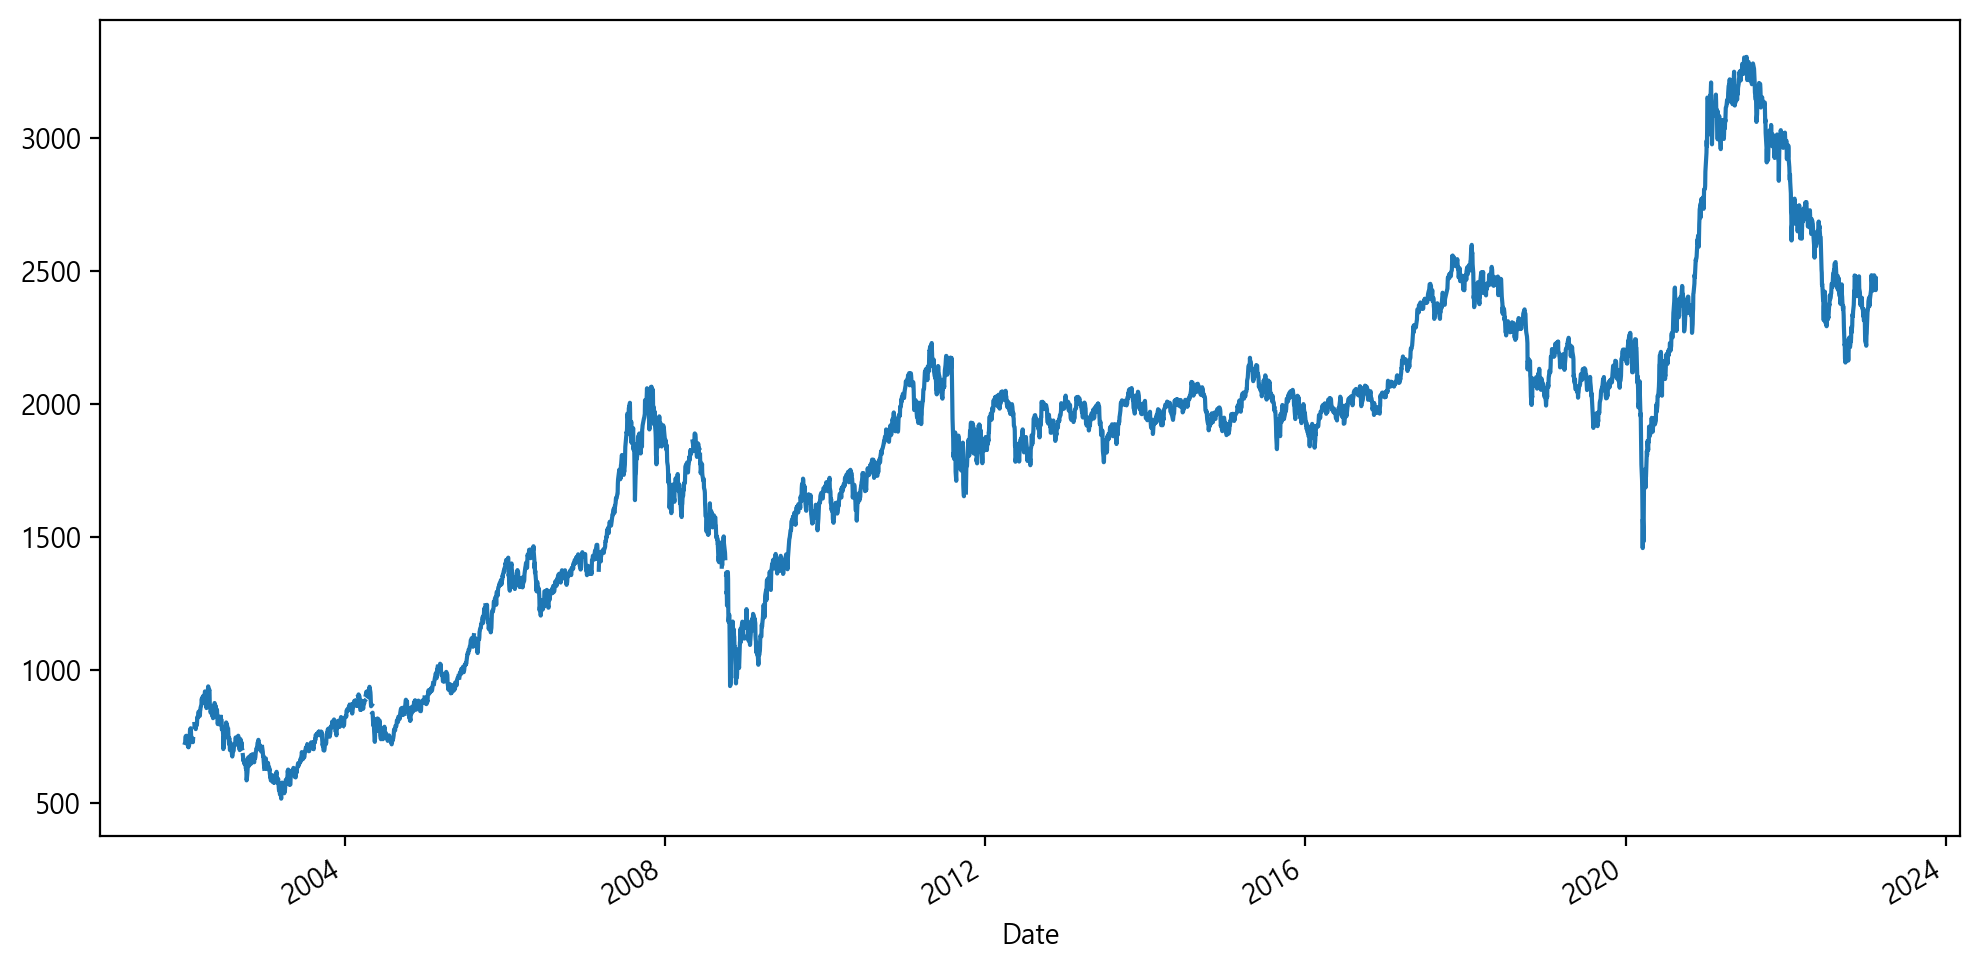

In [123]:
kospi['Close'].plot(figsize = (12, 6))

In [126]:
# 수익변화율과 누적 수익율 컬럼 추가

kospi['rate_of_return'] = kospi['Close'].pct_change()
kospi['cum_ror'] = (kospi['rate_of_return'] + 1).cumprod() - 1
today_cum_ror = kospi['cum_ror'].iloc[-1]                         # 오늘 기준 누적 수익율(제일 마지막 값)
today_cum_ror

2.4091039259131697

In [127]:
# 투자년도

start_date = kospi.index[0]
end_date = kospi.index[-1]
year = (end_date - start_date).days / 365

In [128]:
# 연평균복리수익율

CAGR = (1 + today_cum_ror) ** (1 / year) - 1
CAGR

0.05974027802743809

### [실습] 삼성전자의 변화율, 누적 수익율, CAGR 계산

In [141]:
samsung = fdr.DataReader('005930', '2002')

In [142]:
# 삼성전자의 변화율

samsung['rate_of_return'] = samsung['Close'].pct_change()
samsung

,Open,High,Low,Close,Volume,Change,rate_of_return
Date,,,,,,,
2002-01-02,5660,6160,5620,6160,1142079,0.103943,NaN
2002-01-03,6100,6190,6020,6040,885636,-0.019481,-0.019481
2002-01-04,6380,6410,6290,6380,1009482,0.056291,0.056291
2002-01-07,6260,6430,6170,6360,1029132,-0.003135,-0.003135
2002-01-08,6390,6390,6190,6230,760142,-0.020440,-0.020440
...,...,...,...,...,...,...,...
2023-02-10,62600,63000,62400,62800,9382576,-0.003175,-0.003175
2023-02-13,62900,63000,62300,62900,10730362,0.001592,0.001592
2023-02-14,63600,63900,63200,63200,9126664,0.004769,0.004769


In [143]:
# 누적 수익율

samsung['cum_ror'] = (samsung['rate_of_return'] + 1).cumprod() - 1
samsung_cum_ror = samsung['cum_ror'].iloc[-1]                       # 오늘 기준 누적 수익율을 today_cum_ror 변수에 대입
samsung

,Open,High,Low,Close,Volume,Change,rate_of_return,cum_ror
Date,,,,,,,,
2002-01-02,5660,6160,5620,6160,1142079,0.103943,NaN,NaN
2002-01-03,6100,6190,6020,6040,885636,-0.019481,-0.019481,-0.019481
2002-01-04,6380,6410,6290,6380,1009482,0.056291,0.056291,0.035714
2002-01-07,6260,6430,6170,6360,1029132,-0.003135,-0.003135,0.032468
2002-01-08,6390,6390,6190,6230,760142,-0.020440,-0.020440,0.011364
...,...,...,...,...,...,...,...,...
2023-02-10,62600,63000,62400,62800,9382576,-0.003175,-0.003175,9.194805
2023-02-13,62900,63000,62300,62900,10730362,0.001592,0.001592,9.211039
2023-02-14,63600,63900,63200,63200,9126664,0.004769,0.004769,9.259740


In [144]:
# 투자년도

start_date = samsung.index[0]
end_date = samsung.index[-1]
year = (end_date - start_date).days / 365

In [145]:
# 연평균복리수익율

samsung_CAGR = (1 + today_cum_ror) ** (1 / year) - 1
samsung_CAGR

0.1166950766478605

### 할로윈 투자전략

In [162]:
kospi.head()

,Open,High,Low,Close,Adj Close,Volume,rate_of_return,cur_ror,cum_ror
Date,,,,,,,,,
2002-01-02,698.000000,725.059998,690.359985,724.950012,724.950012,618700.0,NaN,NaN,NaN
2002-01-03,726.760010,735.770020,722.349976,727.659973,727.659973,752600.0,0.003738,0.003738,0.003738
2002-01-04,744.460022,750.830017,739.140015,747.719971,747.719971,630700.0,0.027568,0.031409,0.031409
2002-01-07,748.539978,757.809998,735.549988,751.479980,751.479980,753600.0,0.005029,0.036596,0.036596
2002-01-08,747.210022,750.890015,734.760010,734.760010,734.760010,799300.0,-0.022249,0.013532,0.013532


In [ ]:
# 코스피의 월별 수익률의 총합을 바그래프로 그리기

# 월초 Open, 월 말의 Close / 월 (Month) / 수익률(rate_of_return)

# resample / date -> month -> groupby

In [163]:
# step 1 (월별로 정렬 -> 같은 월에 데이터를 모아줌)

month_kospi_price = kospi.resample('MS').agg({'Open':'first', 'Close':'last'})
month_kospi_price.head()

,Open,Close
Date,,
2002-01-01,698.000000,748.070007
2002-02-01,757.070007,819.989990
2002-03-01,842.210022,895.580017
2002-04-01,900.469971,842.340027
2002-05-01,855.409973,796.400024


In [164]:
# step 2 (수익률 계산)

month_kospi_price['rate_of_return'] = month_kospi_price.pct_change(axis=1).iloc[:, -1]
month_kospi_price.head()

,Open,Close,rate_of_return
Date,,,
2002-01-01,698.000000,748.070007,0.071734
2002-02-01,757.070007,819.989990,0.083110
2002-03-01,842.210022,895.580017,0.063369
2002-04-01,900.469971,842.340027,-0.064555
2002-05-01,855.409973,796.400024,-0.068984


In [165]:
# step 3 (월 데이터 추출)

month_kospi_price['Month'] = month_kospi_price.index.month
month_kospi_price

,Open,Close,rate_of_return,Month
Date,,,,
2002-01-01,698.000000,748.070007,0.071734,1
2002-02-01,757.070007,819.989990,0.083110,2
2002-03-01,842.210022,895.580017,0.063369,3
2002-04-01,900.469971,842.340027,-0.064555,4
2002-05-01,855.409973,796.400024,-0.068984,5
...,...,...,...,...
2022-10-01,2189.510010,2293.610107,0.047545,10
2022-11-01,2301.580078,2472.530029,0.074275,11
2022-12-01,2501.429932,2236.399902,-0.105951,12


In [166]:
# step 4 (같은 월끼리 sum)

sum_month_ror = month_kospi_price.groupby('Month').sum()[['rate_of_return']]
sum_month_ror.head()

,rate_of_return
Month,
1,-0.011423
2,0.130483
3,0.225519
4,0.548773
5,-0.084862


<AxesSubplot: xlabel='Month'>

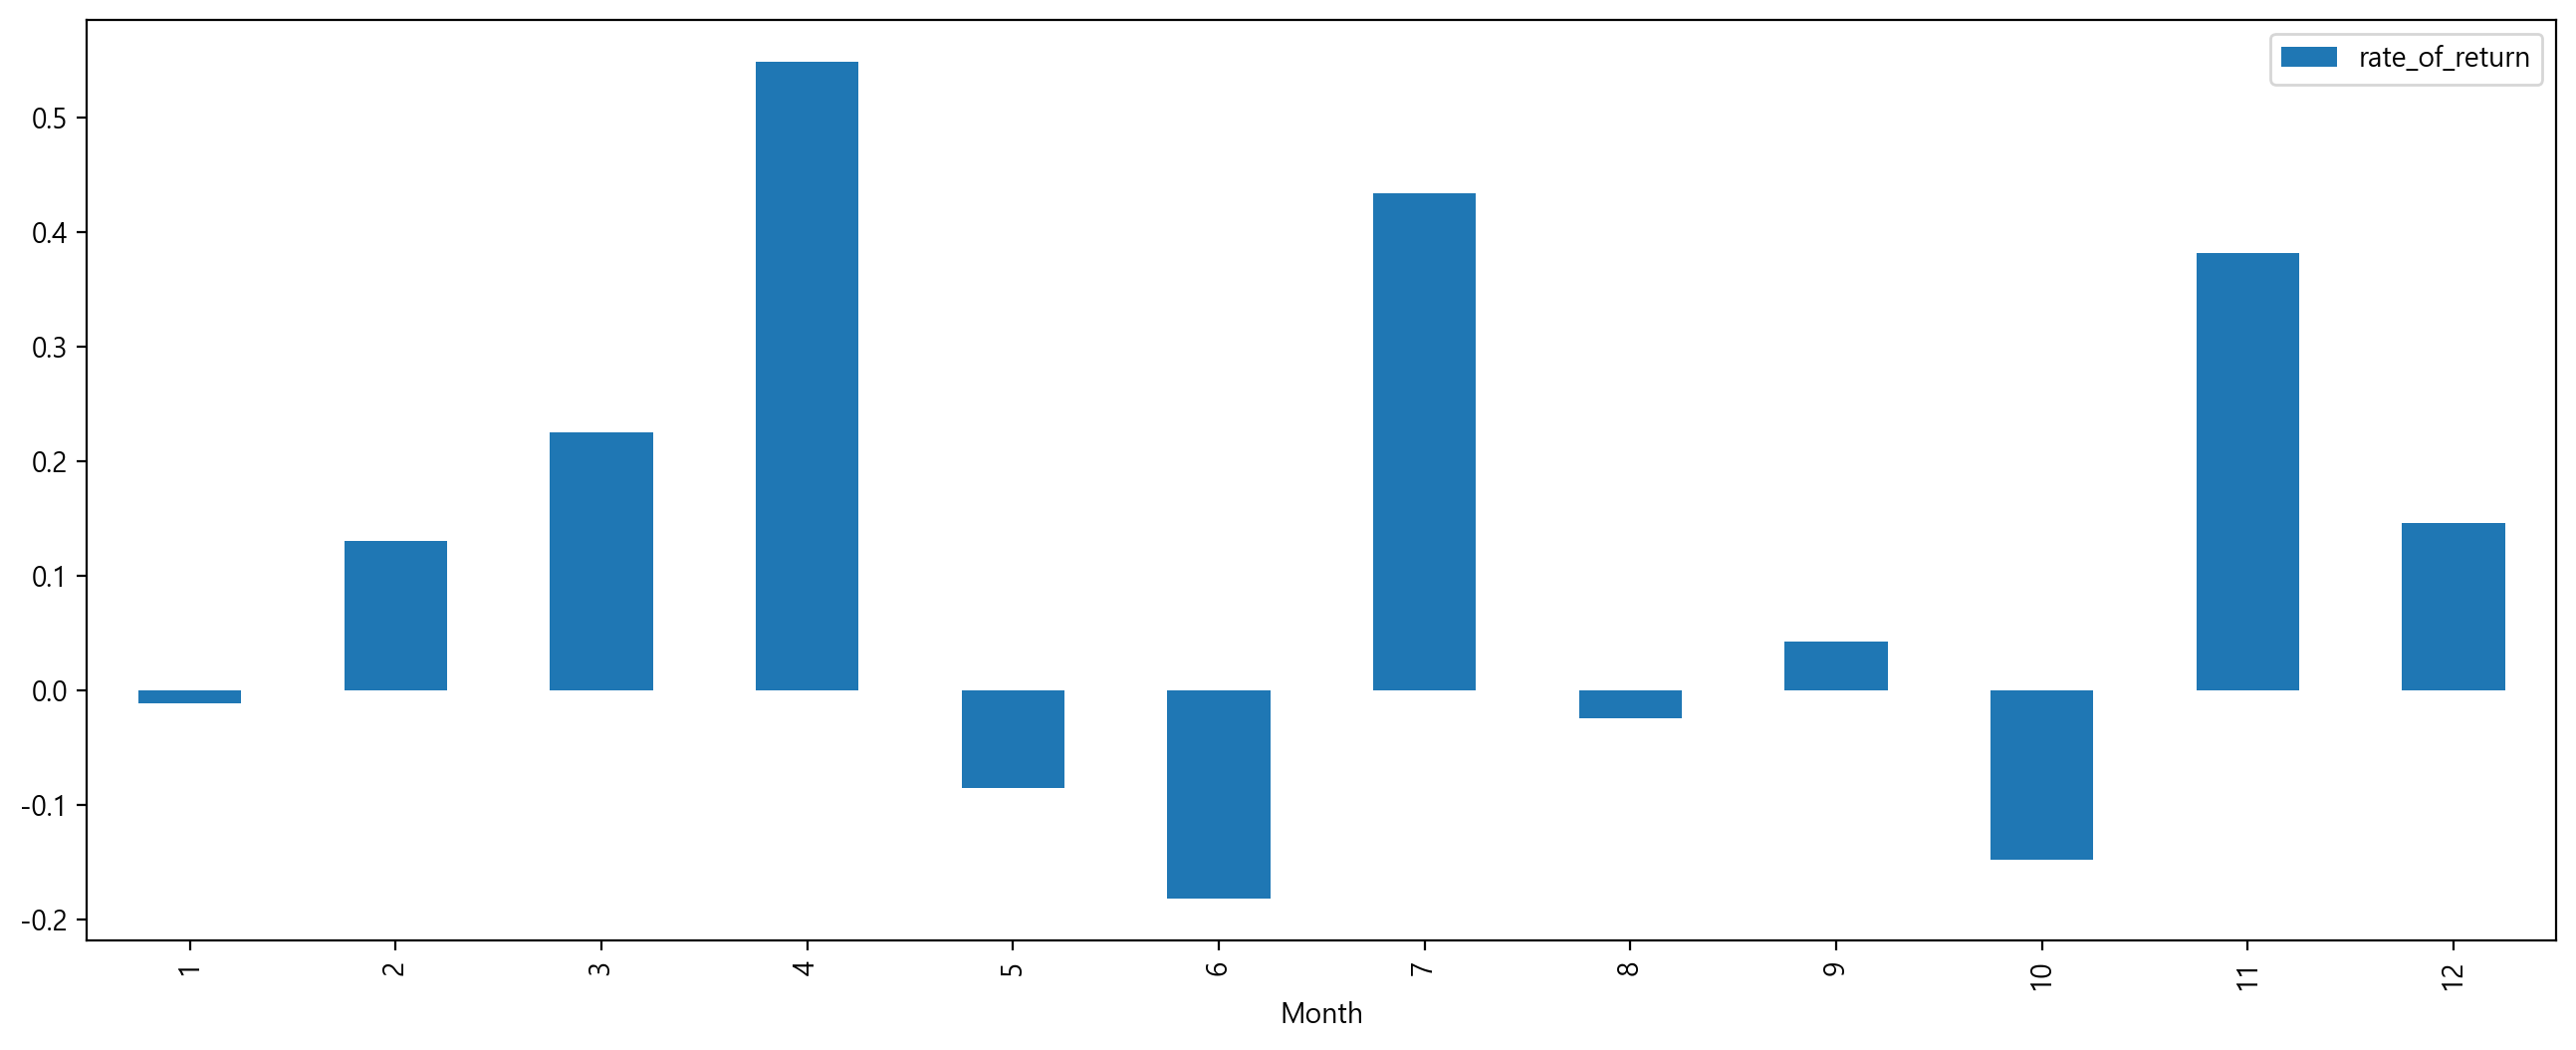

In [167]:
# step 5 (시각화)
sum_month_ror.plot.bar(figsize=(16, 6))

In [168]:
month_kospi_price.head()

,Open,Close,rate_of_return,Month
Date,,,,
2002-01-01,698.000000,748.070007,0.071734,1
2002-02-01,757.070007,819.989990,0.083110,2
2002-03-01,842.210022,895.580017,0.063369,3
2002-04-01,900.469971,842.340027,-0.064555,4
2002-05-01,855.409973,796.400024,-0.068984,5


### 11월 매수, 4월 매도

In [197]:
kospi_price = month_kospi_price[['Open', 'Close', 'Month']].copy()
kospi_price

,Open,Close,Month
Date,,,
2002-01-01,698.000000,748.070007,1
2002-02-01,757.070007,819.989990,2
2002-03-01,842.210022,895.580017,3
2002-04-01,900.469971,842.340027,4
2002-05-01,855.409973,796.400024,5
...,...,...,...
2022-10-01,2189.510010,2293.610107,10
2022-11-01,2301.580078,2472.530029,11
2022-12-01,2501.429932,2236.399902,12


In [198]:
subset_kospi_price = kospi_price[kospi_price['Month'].isin([4, 11])]
subset_kospi_price.head()

,Open,Close,Month
Date,,,
2002-04-01,900.469971,842.340027,4
2002-11-01,652.340027,724.799988,11
2003-04-01,529.070007,599.349976,4
2003-11-01,783.080017,796.179993,11
2004-04-01,878.780029,862.840027,4


In [199]:
# 11월 시가 / 4월 종가

month4 = subset_kospi_price[subset_kospi_price['Month'] == 4][['Close']]     # 4월 Close
month11 = subset_kospi_price[subset_kospi_price['Month'] == 11][['Open']]     # 11월 Open
month4_lag1 = month4.shift(-1)                                                # 다음 해에 팔 가격을 shift로 올림

In [200]:
# 붙여줄 index를 연도로 변경

month4_lag1.index = month4_lag1.index.year
month11.index = month11.index.year

In [201]:
# concat하여 [month4_lag1, month11]을 붙임

HWN_kospi_price = pd.concat([month4_lag1, month11], axis = 1)
HWN_kospi_price.head()

,Close,Open
Date,,
2002,599.349976,652.340027
2003,862.840027,783.080017
2004,911.299988,832.520020
2005,1419.729980,1165.770020
2006,1542.239990,1372.030029


In [203]:
# 수익율 - 시가 대비 종가 얼마나 수익을 올렸는가 

HWN_kospi_price['rate_of_return'] = HWN_kospi_price['Close'] / HWN_kospi_price['Open'] - 1
HWN_kospi_price.head()

,Close,Open,rate_of_return
Date,,,
2002,599.349976,652.340027,-0.081231
2003,862.840027,783.080017,0.101854
2004,911.299988,832.520020,0.094628
2005,1419.729980,1165.770020,0.217847
2006,1542.239990,1372.030029,0.124057


In [204]:
# 누적수익률

HWN_kospi_price['cum_ror'] = (HWN_kospi_price['rate_of_return'] + 1).cumprod() - 1
HWN_kospi_price.

,Close,Open,rate_of_return,cum_ror
Date,,,,
2018,2203.590088,2035.109985,0.082787,1.793271
2019,1947.560059,2084.790039,-0.065824,1.609405
2020,3147.860107,2276.610107,0.382696,2.608015
2021,2695.050049,2984.179932,-0.096888,2.258443
2022,NaN,2301.580078,NaN,NaN


In [208]:
# 2022년 4월이 아직 없기에 마지막 2022년도 값은 NaN -> 날려줌

HWN_kospi_price = HWN_kospi_price.dropna(axis = 0)

In [209]:
last_cum_ror = HWN_kospi_price['cum_ror'].iloc[-1]

In [210]:
# 연복리 수익률

year = HWN_kospi_price.index[-1] - HWN_kospi_price.index[0]
HWN_CAGR = (1 + last_cum_ror) ** (1 / year) - 1
HWN_CAGR

0.06414432930380065

# S&P500

In [ ]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
sp500 = fdr.DataReader('US500', '2002')

## 변동성 돌파 매매

In [225]:
df = fdr.DataReader('247540', '2019')
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-03-05,15096,16208,14800,15616,15995367,NaN
2019-03-06,15911,17196,15738,16975,6007950,0.087026
2019-03-07,17369,17888,17097,17296,4126721,0.018910
2019-03-08,17295,17493,16702,17271,1910858,-0.001445
2019-03-11,17196,17369,16332,17098,1597077,-0.010017


<AxesSubplot: xlabel='Date'>

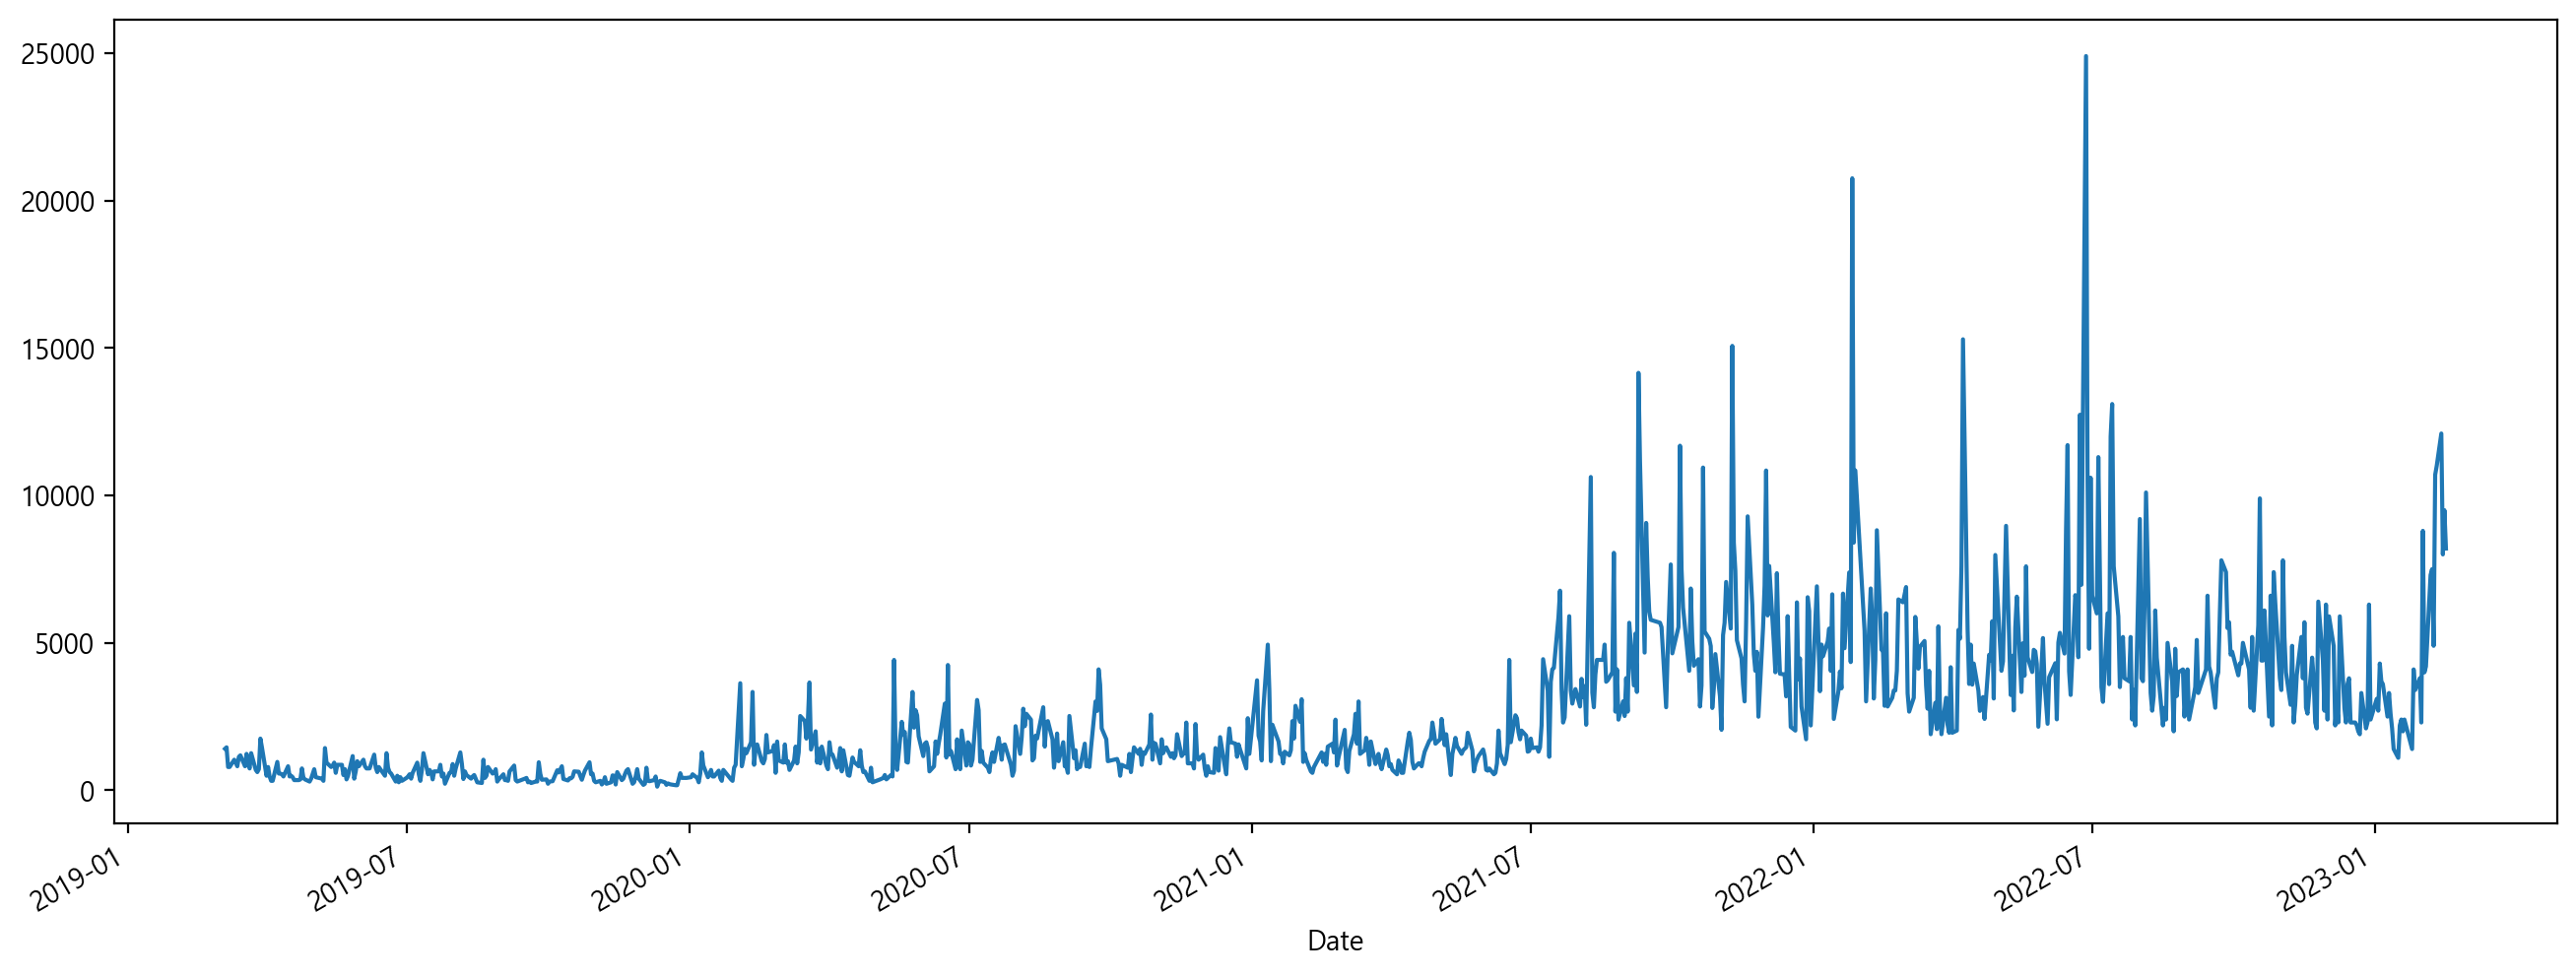

In [226]:
# 고가 - 저가

(df['High'] - df['Low']).plot(figsize=(16, 6))

In [ ]:
# High - Low가 크다 and High - Low가 작다

<AxesSubplot: xlabel='Date'>

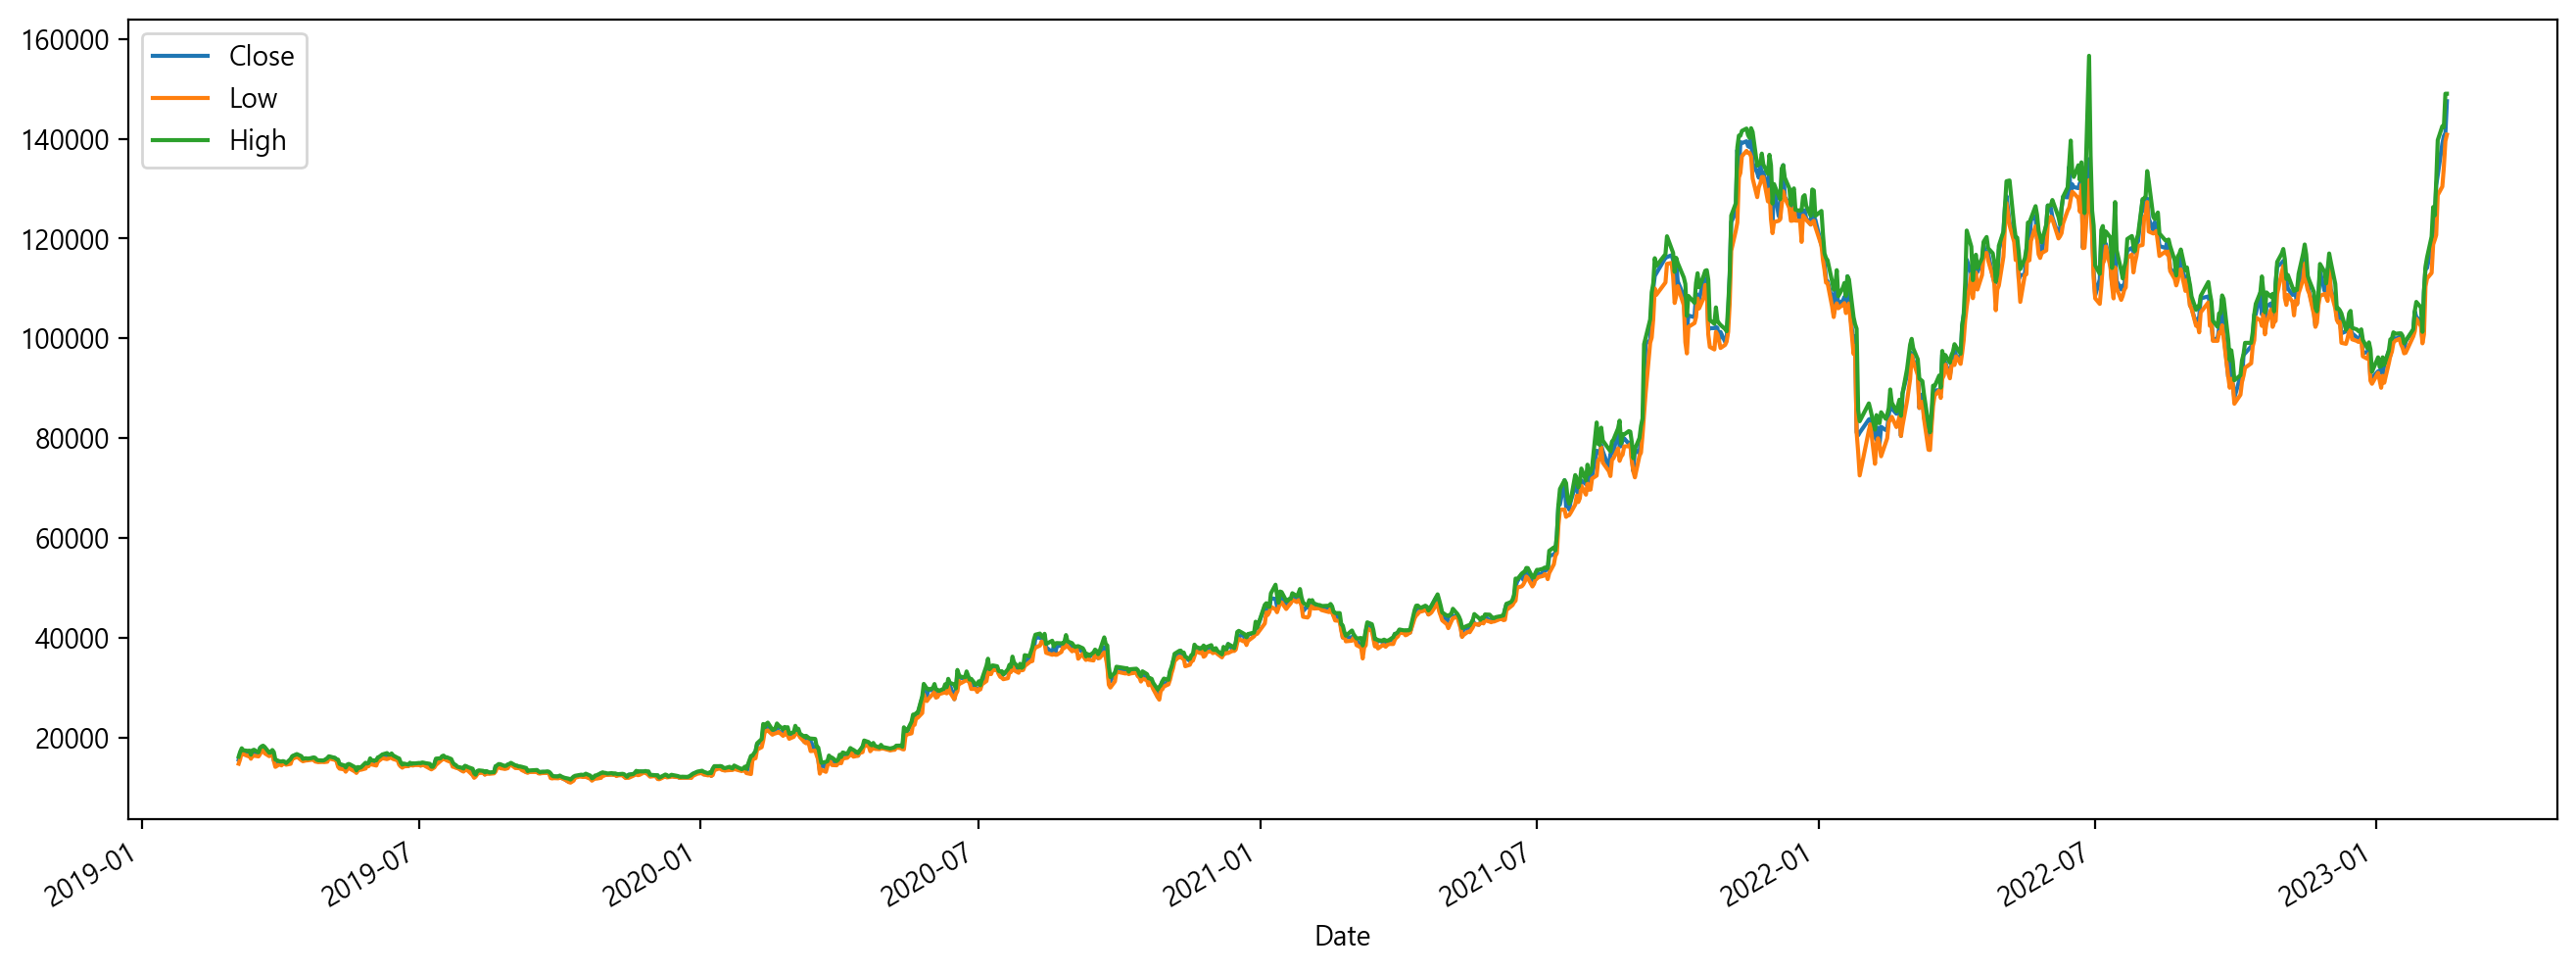

In [227]:
# 주식의 가격이 오른다(시장경제 측면에서) -> 매수량이 많다.
# 사려는 사람이 많다 -> 미래에도 오를 것이다. -> 원하는 사람이 많다.

df[['Close', 'Low', 'High']].plot(figsize = (16, 6))

In [228]:
# 당일 변동폭을 새로운 컬럼에 추가 후 shift를 사용하여 전날 변동폭을 yeterday_range컬럼에 추가

df['Range'] = df['High'] - df['Low']
df['Yesterday_Range'] = df['Range'].shift()
df.head()

,Open,High,Low,Close,Volume,Change,Range,Yesterday_Range
Date,,,,,,,,
2019-03-05,15096,16208,14800,15616,15995367,NaN,1408,NaN
2019-03-06,15911,17196,15738,16975,6007950,0.087026,1458,1408.0
2019-03-07,17369,17888,17097,17296,4126721,0.018910,791,1458.0
2019-03-08,17295,17493,16702,17271,1910858,-0.001445,791,791.0
2019-03-11,17196,17369,16332,17098,1597077,-0.010017,1037,791.0


In [229]:
# 시가 대비 전날 변동성에서 절반 이상 상승 -> 원하는 사람이 많다고 판단 / 목표로 구매할 가격 = (시가 + 전날 변동성) * 0.5

df['Buy_Price'] = df['Open'] + df['Yesterday_Range'] * 0.5
df.head()

,Open,High,Low,Close,Volume,Change,Range,Yesterday_Range,Buy_Price
Date,,,,,,,,,
2019-03-05,15096,16208,14800,15616,15995367,NaN,1408,NaN,NaN
2019-03-06,15911,17196,15738,16975,6007950,0.087026,1458,1408.0,16615.0
2019-03-07,17369,17888,17097,17296,4126721,0.018910,791,1458.0,18098.0
2019-03-08,17295,17493,16702,17271,1910858,-0.001445,791,791.0,17690.5
2019-03-11,17196,17369,16332,17098,1597077,-0.010017,1037,791.0,17591.5


In [230]:
df = df.dropna()

In [231]:
# 목표한 구매 가격이 그날 구매로 이어졌는지 확인

df['Buy_Signal'] = np.where(df['High'] >= df['Buy_Price'], 1, 0)
df.head()

,Open,High,Low,Close,Volume,Change,Range,Yesterday_Range,Buy_Price,Buy_Signal
Date,,,,,,,,,,
2019-03-06,15911,17196,15738,16975,6007950,0.087026,1458,1408.0,16615.0,1
2019-03-07,17369,17888,17097,17296,4126721,0.018910,791,1458.0,18098.0,0
2019-03-08,17295,17493,16702,17271,1910858,-0.001445,791,791.0,17690.5,0
2019-03-11,17196,17369,16332,17098,1597077,-0.010017,1037,791.0,17591.5,0
2019-03-12,17147,17419,16480,16604,1356933,-0.028892,939,1037.0,17665.5,0


In [235]:
# 거래가 이루어진 날, 수익과 수익율을 return (종가 - 구매한 가격)

df['Return'] = np.where(df['Buy_Signal'] == 1, df['Close'] - df['Buy_Price'], None)               # 수익
df['rate_of_return'] = np.where(df['Buy_Signal'] == 1, df['Close'] / df['Buy_Price'] - 1, None)   # 수익율
df.head()

,Open,High,Low,Close,Volume,Change,Range,Yesterday_Range,Buy_Price,Buy_Signal,Return,rate_of_return
Date,,,,,,,,,,,,
2019-03-06,15911,17196,15738,16975,6007950,0.087026,1458,1408.0,16615.0,1,360.0,0.021667
2019-03-07,17369,17888,17097,17296,4126721,0.018910,791,1458.0,18098.0,0,None,None
2019-03-08,17295,17493,16702,17271,1910858,-0.001445,791,791.0,17690.5,0,None,None
2019-03-11,17196,17369,16332,17098,1597077,-0.010017,1037,791.0,17591.5,0,None,None
2019-03-12,17147,17419,16480,16604,1356933,-0.028892,939,1037.0,17665.5,0,None,None


In [236]:
# 누적보유 수익율

df['cum_ror'] = (df['rate_of_return'] + 1).cumprod() - 1
df.tail()

,Open,High,Low,Close,Volume,Change,Range,Yesterday_Range,Buy_Price,Buy_Signal,Return,rate_of_return,cum_ror
Date,,,,,,,,,,,,,
2023-02-10,135400,139700,128700,132700,2873415,0.015302,11000,10700.0,140750.0,0,None,None,NaN
2023-02-13,132600,142500,130400,139000,3447025,0.047476,12100,11000.0,138100.0,1,900.0,0.006517,3.611204
2023-02-14,141900,142300,134300,140500,2241781,0.010791,8000,12100.0,147950.0,0,None,None,NaN
2023-02-15,142500,149000,139500,141100,3489156,0.004270,9500,8000.0,146500.0,1,-5400.0,-0.03686,3.441235
2023-02-16,145500,149000,140800,147500,2323816,0.045358,8200,9500.0,150250.0,0,None,None,NaN


In [239]:
# 연복리 수익률을 구하기 위한 투자년도 구하기

start_date = df.index[0]
end_date = df.index[-1]
year = (end_date - start_date).days / 365
year

3.9534246575342467

In [243]:
# 연복리 수익률

last_cum_ror = df['cum_ror'].dropna(axis=0).iloc[-1]
CAGR = (1 + last_cum_ror) ** (1 / year) - 1
print(f'CAGR : {round(CAGR * 100, 2)} %')

CAGR : 45.81 %


### Buy & Hold vs 변동성 돌파 매매

In [244]:
df.head()

,Open,High,Low,Close,Volume,Change,Range,Yesterday_Range,Buy_Price,Buy_Signal,Return,rate_of_return,cum_ror
Date,,,,,,,,,,,,,
2019-03-06,15911,17196,15738,16975,6007950,0.087026,1458,1408.0,16615.0,1,360.0,0.021667,0.021667
2019-03-07,17369,17888,17097,17296,4126721,0.018910,791,1458.0,18098.0,0,None,None,NaN
2019-03-08,17295,17493,16702,17271,1910858,-0.001445,791,791.0,17690.5,0,None,None,NaN
2019-03-11,17196,17369,16332,17098,1597077,-0.010017,1037,791.0,17591.5,0,None,None,NaN
2019-03-12,17147,17419,16480,16604,1356933,-0.028892,939,1037.0,17665.5,0,None,None,NaN


In [245]:
buy_and_hold = df[['Close']]
buy_and_hold

,Close
Date,
2019-03-06,16975
2019-03-07,17296
2019-03-08,17271
2019-03-11,17098
2019-03-12,16604
...,...
2023-02-10,132700
2023-02-13,139000
2023-02-14,140500


In [248]:
# buy_and_hold 

buy_and_hold['rate_of_return'] = buy_and_hold['Close'].pct_change()                # 수익률
buy_and_hold['cum_ror'] = (buy_and_hold['rate_of_return'] + 1).cumprod() - 1       # 누적수익률

start_date = buy_and_hold.index[0]
end_date = buy_and_hold.index[-1]
year = (end_date - start_date).days / 365

last_cum_ror = buy_and_hold['cum_ror'].dropna(axis = 0).iloc[-1]

buy_and_hold_CAGR = (1 + last_cum_ror) ** (1 / year) - 1
print(f'CAGR : {round(buy_and_hold_CAGR * 100, 2)} %')

CAGR : 72.79 %


C:\Users\GM220808\AppData\Local\Temp\ipykernel_13956\1728405722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_and_hold['rate_of_return'] = buy_and_hold['Close'].pct_change()                # 수익률
C:\Users\GM220808\AppData\Local\Temp\ipykernel_13956\1728405722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_and_hold['cum_ror'] = (buy_and_hold['rate_of_return'] + 1).cumprod() - 1       # 누적수익률


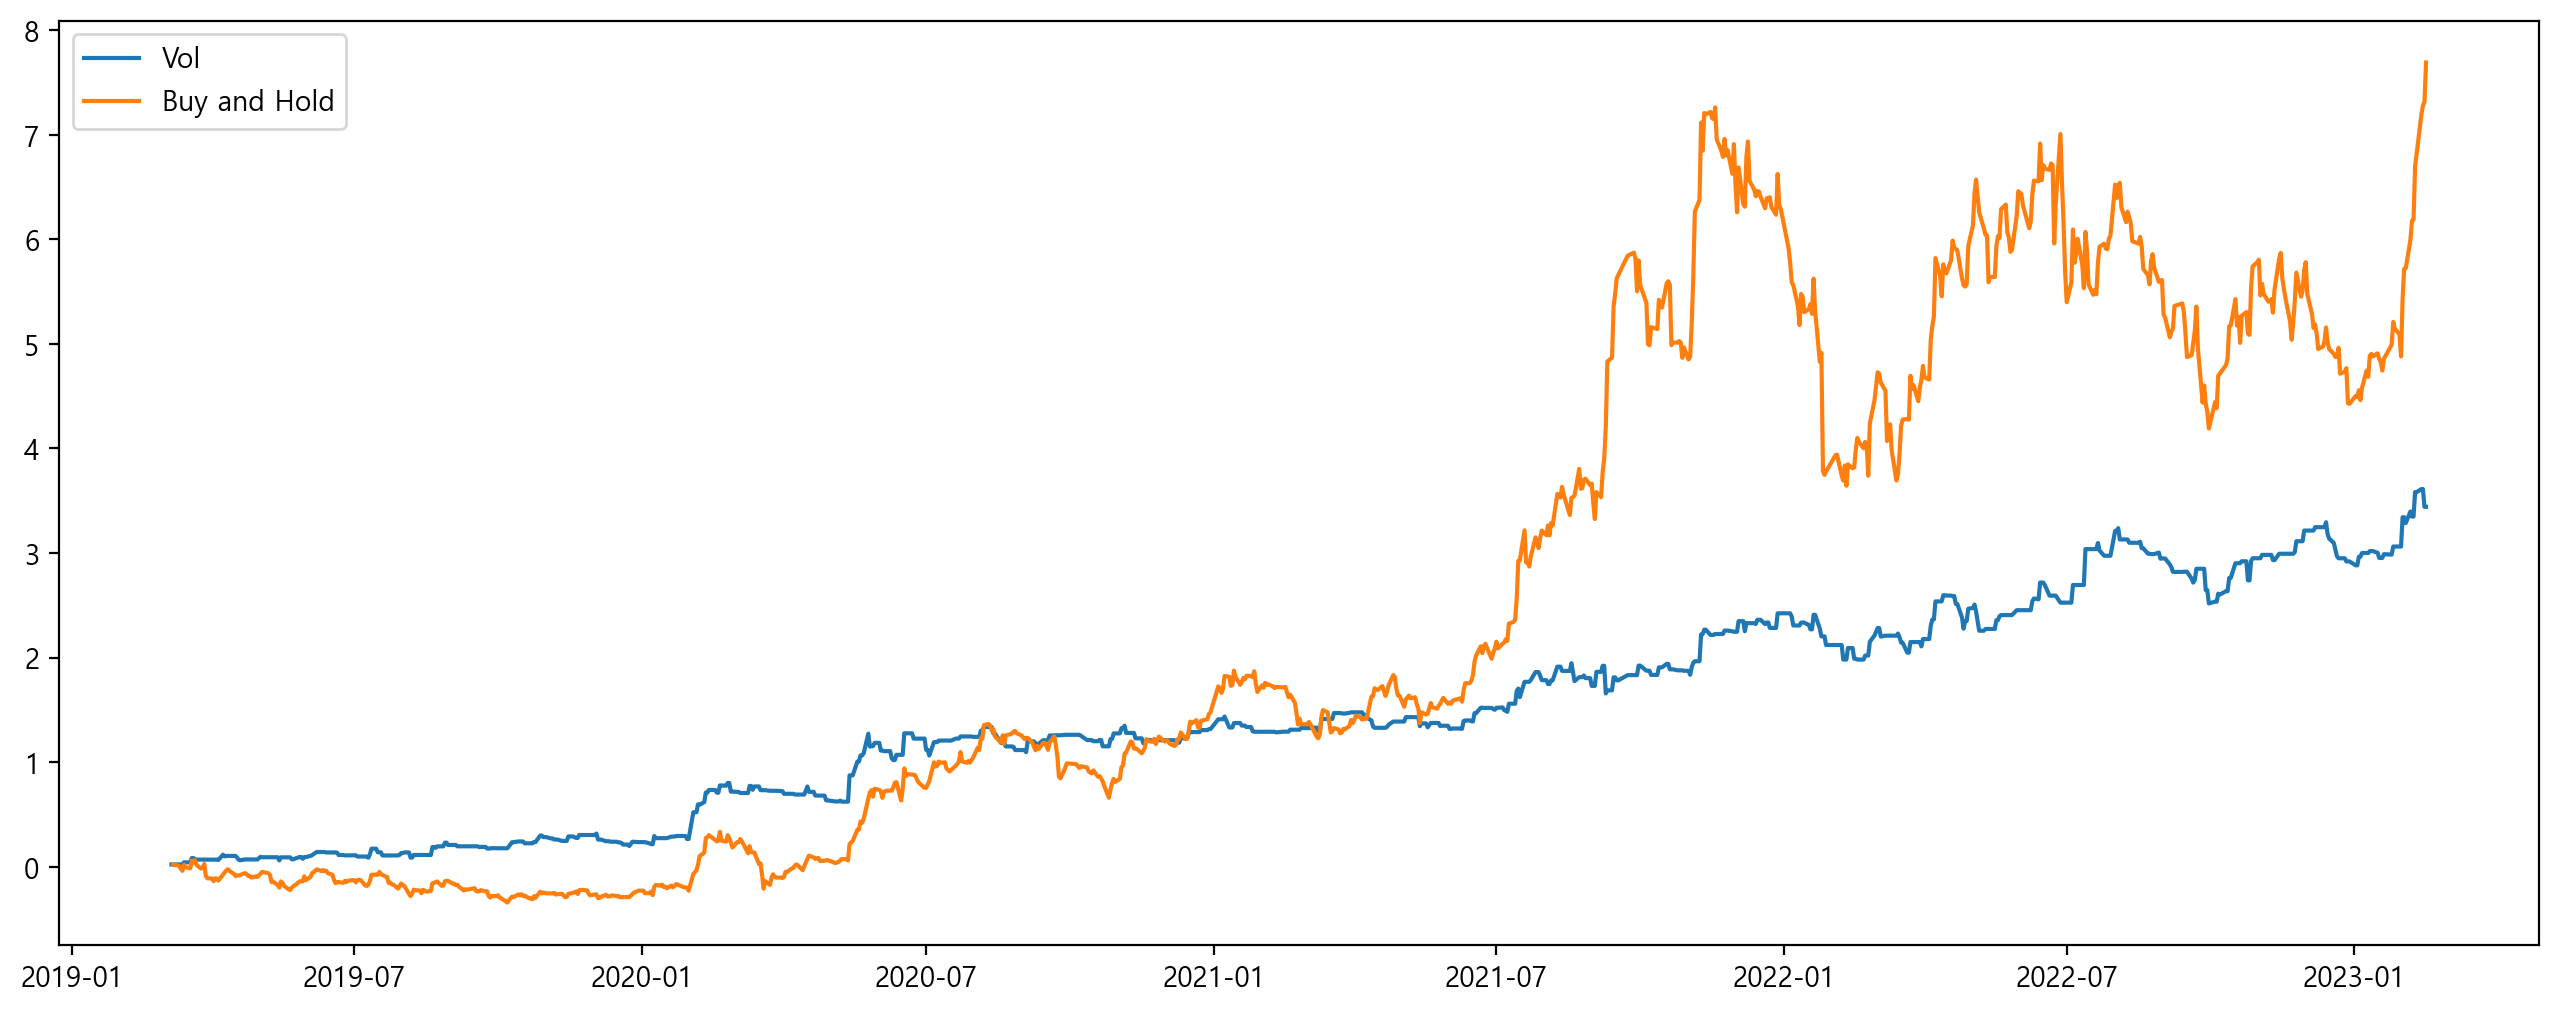

In [249]:
# 시각화 

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (16, 6))
plt.plot(df.index, df['cum_ror'].fillna(method = 'ffill'), label = 'Vol')
plt.plot(buy_and_hold.index, buy_and_hold['cum_ror'], label = 'Buy and Hold')
plt.legend()